<a href="https://colab.research.google.com/github/lpdata/fraude_bilhetagem/blob/main/notebooks/03_modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelagem e Comparação de Modelos Interpretáveis para Detecção de Fraudes em Bilhetagem Eletrônica

# 1. SELEÇÃO E JUSTIFICATIVA DOS MODELOS CANDIDATOS

## 1.1 Descrição da Etapa

Antes da etapa de treinamento, é fundamental avaliar quais algoritmos de Machine Learning são mais adequados ao problema de detecção de fraude em sistemas de bilhetagem eletrônica, considerando as características do dataset e os requisitos do projeto.

Este problema consiste em uma **classificação binária**, com **classes desbalanceadas**, baseada em **dados estruturados/tabulares**, fortemente apoiados em **engenharia de features**. Além disso, há uma exigência explícita de **interpretabilidade**, uma vez que os resultados do modelo precisam ser compreensíveis e justificáveis em um contexto operacional.

Dessa forma, a escolha dos modelos não deve se basear apenas em performance preditiva, mas também em critérios como transparência, estabilidade e facilidade de comunicação dos resultados.

---

## 1.2 Comparação dos Modelos Candidatos

A seguir, são apresentados os principais modelos candidatos considerados para este problema, juntamente com uma análise qualitativa de seus principais prós e contras, bem como sua adequação ao contexto da detecção de fraudes.

| Modelo | Prós | Contras | Adequação |
|------|-----|---------|-----------|
| **Regressão Logística** | Alta interpretabilidade<br>Coeficientes explicáveis<br>Baseline robusto | Relações lineares<br>Depende de boas features | **Muito alta**<br>Baseline interpretável |
| **Árvore de Decisão** | Regras claras<br>Alta explicabilidade<br>Captura não linearidades | Sensível a ruído<br>Overfitting sem controle | **Alta**<br>Boa para explicação |
| **Random Forest** | Boa performance<br>Reduz overfitting<br>Interações complexas | Menor transparência<br>Custo computacional maior | **Alta**<br>Equilíbrio geral |
| Gradient Boosting | Forte poder preditivo<br>Bom em fraude | Complexidade elevada<br>Difícil explicação | Média |
| XGBoost / LightGBM | Performance de ponta<br>Robusto | Caixa-preta relativa<br>Difícil uso operacional | Média / Baixa |
| SVM | Bom em certos cenários | Pouco interpretável<br>Escala limitada | Baixa |
| kNN | Simples conceitualmente | Não escala bem<br>Difícil interpretação | Baixa |
| Naive Bayes | Rápido<br>Simples | Suposição forte<br>Baixa performance | Baixa |


---

## 1.3 Modelos Selecionados para a Etapa de Modelagem

Com base na análise comparativa apresentada, a seleção dos modelos para a etapa de modelagem considerou os seguintes critérios:

- Prioridade à **interpretabilidade**, conforme exigido pelo projeto  
- Adequação a **dados tabulares** e features engenheiradas  
- Capacidade de lidar com **desbalanceamento de classes**  
- Equilíbrio entre **capacidade preditiva** e **explicabilidade**  
- Facilidade de comunicação dos resultados em ambiente operacional  

Dessa forma, foram selecionados os seguintes modelos para a competição de performance:

### Modelos escolhidos

- **Regressão Logística**  
  Utilizada como baseline interpretável, permitindo análise direta do impacto das variáveis explicativas sobre a probabilidade de fraude.

- **Árvore de Decisão (com profundidade controlada)**  
  Empregada para capturar padrões não lineares de forma transparente, por meio de regras explícitas de decisão.

- **Random Forest**  
  Utilizada como modelo mais robusto, oferecendo ganho de performance ao mesmo tempo em que preserva mecanismos de explicabilidade baseados em importância das variáveis.

Essa combinação de modelos garante uma comparação justa entre abordagens lineares e não lineares, atendendo aos requisitos técnicos e metodológicos do projeto.


# 2. CONFIGURAÇÕES INICIAIS

## 2.1 Vinculação com Github

In [148]:
import os
from pathlib import Path

REPO_NAME = "fraude_bilhetagem"
REPO_URL = "https://github.com/lpdata/fraude_bilhetagem"

%cd /content

if not Path(REPO_NAME).exists():
    !git clone {REPO_URL}
else:
    print(f"Repo '{REPO_NAME}' já existe em /content. Pulando clone.")

%cd /content/{REPO_NAME}

!ls

!ls data/processed

print("Diretório atual:", os.getcwd())

/content
Repo 'fraude_bilhetagem' já existe em /content. Pulando clone.
/content/fraude_bilhetagem
data  notebooks  README.md  requirements.txt  src
dados_tratados.csv     metadados_dataset.json
metadados_colunas.csv  schema_dados_tratados.json
Diretório atual: /content/fraude_bilhetagem


In [149]:
# Definição de caminhos oficiais do notebook 03
DATA_PROCESSED_DIR = "data/processed"
DATASET_PATH = f"{DATA_PROCESSED_DIR}/dados_tratados.csv"
SCHEMA_PATH = f"{DATA_PROCESSED_DIR}/schema_dados_tratados.json"
METADADOS_COLUNAS_PATH = f"{DATA_PROCESSED_DIR}/metadados_colunas.csv"
METADADOS_DATASET_PATH = f"{DATA_PROCESSED_DIR}/metadados_dataset.json"

print("Dataset (modelagem):", DATASET_PATH)
print("Schema:", SCHEMA_PATH)
print("Metadados colunas:", METADADOS_COLUNAS_PATH)
print("Metadados dataset:", METADADOS_DATASET_PATH)

from pathlib import Path
paths = [DATASET_PATH, SCHEMA_PATH, METADADOS_COLUNAS_PATH, METADADOS_DATASET_PATH]
missing = [p for p in paths if not Path(p).exists()]
if missing:
    raise FileNotFoundError(f"Arquivos esperados não encontrados em {DATA_PROCESSED_DIR}: {missing}")

print("OK — artefatos de modelagem encontrados e prontos para uso.")

Dataset (modelagem): data/processed/dados_tratados.csv
Schema: data/processed/schema_dados_tratados.json
Metadados colunas: data/processed/metadados_colunas.csv
Metadados dataset: data/processed/metadados_dataset.json
OK — artefatos de modelagem encontrados e prontos para uso.


<small>***Comentários Letícia:** Neste ponto do projeto, já trabalho diretamente com o dataset processado, que concentra todas as decisões tomadas nas etapas anteriores de exploração, tratamento e engenharia de features. Optei por iniciar a modelagem a partir desse artefato final justamente para preservar o que já foi avaliado e validado, garantindo continuidade ao pipeline e evitando qualquer retorno desnecessário aos dados brutos. A verificação dos arquivos serve apenas para confirmar que estou partindo da base correta antes de avançar para a construção dos modelos.*</small>

## 2.2 Imports e configurações

In [150]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd

# Reprodutibilidade global
SEED = 42
np.random.seed(SEED)

# Configurações de exibição do notebook
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

# Imports para modelagem e pipelines
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Modelos selecionados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas de avaliação (fraude / desbalanceamento)
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

print("OK — imports carregados e configurações aplicadas.")
print("SEED:", SEED)

OK — imports carregados e configurações aplicadas.
SEED: 42


<small>***Comentários Letícia:** Nesta etapa, organizei os imports e defini as configurações iniciais do ambiente para garantir consistência ao longo de toda a modelagem. A definição da seed é importante para que os resultados sejam reproduzíveis e comparáveis entre os modelos, evitando variações causadas por aleatoriedade. Com isso, deixei o ambiente preparado para seguir com segurança para as próximas etapas de validação e treino dos modelos.*</small>

## 2.3 Carregamento dos dados e validação de integridade

### 2.3.1 Carregar dataset processado

In [151]:
df = pd.read_csv(DATASET_PATH)

print("Dataset carregado com sucesso.")
print("Shape do dataset:", df.shape)

df.head()

Dataset carregado com sucesso.
Shape do dataset: (30000, 42)


,id_transacao,id_cartao,ts_transacao,target_fraude,hora_transacao,dia_semana,data_transacao,fim_de_semana,tempo_vida_cartao_dias,tempo_desde_ultima_transacao_min,tempo_desde_ultima_transacao_horas,uso_intervalo_curto,qtd_transacoes_dia,qtd_transacoes_24h,uso_intenso_24h,linha_repetida,dispositivo_repetido,qtd_linhas_distintas_dia,qtd_dispositivos_distintos_dia,idade_suspeita,feriado_bin,feriado_nao_mapeado,temp_faixa,sentido_ida,clima_adverso,valor_transacao_faixa,cartao_qtd_transacoes,cartao_dias_ativos,cartao_media_transacoes_por_dia,cartao_qtd_linhas_distintas,cartao_qtd_dispositivos_distintos,cartao_qtd_motoristas_distintos,cartao_valor_transacao_mean,cartao_valor_transacao_std,cartao_pct_integracao,cartao_pct_feriado,cartao_pct_intervalo_curto,periodo_dia,valor_vs_media_cartao,valor_zscore_cartao,valor_outlier_cartao,uso_acima_media_dia_cartao
0,15192,10000,2026-01-24 10:54:15,1,10,5,2026-01-24,1,1848,NaN,NaN,0,1,1,0,0,0,1,1,0,0,0,25-30,0,1,baixo,2,2,1.0,2,2,2,4.5,0.000000,0.0,0.0,0.0,manha,0.0,0.000000,0,0
1,24059,10000,2026-01-29 10:03:32,0,10,3,2026-01-29,0,1089,7149.283333,119.154722,0,1,1,0,0,0,1,1,0,0,0,>30,0,1,baixo,2,2,1.0,2,2,2,4.5,0.000000,0.0,0.0,0.0,manha,0.0,0.000000,0,0
2,1599,10001,2026-01-03 04:46:30,0,4,5,2026-01-03,1,1388,NaN,NaN,0,1,1,0,0,0,1,1,0,0,0,25-30,1,0,baixo,5,5,1.0,5,5,5,3.6,2.012461,0.4,0.0,0.0,madrugada,3.6,-1.788854,0,0
3,17807,10001,2026-01-05 17:53:24,0,17,0,2026-01-05,0,920,3666.900000,61.115000,0,1,1,0,0,0,1,1,0,0,0,25-30,0,0,baixo,5,5,1.0,5,5,5,3.6,2.012461,0.4,0.0,0.0,tarde,0.9,0.447214,0,0
4,21208,10001,2026-01-16 02:22:42,0,2,4,2026-01-16,0,721,14909.300000,248.488333,0,1,1,0,0,0,1,1,0,0,0,25-30,1,1,baixo,5,5,1.0,5,5,5,3.6,2.012461,0.4,0.0,0.0,madrugada,0.9,0.447214,0,0


### 2.3.2 Validar colunas esperadas (schema check)

In [152]:
# lista esperada de colunas com base no artefato final do projeto
expected_columns = {
    "id_transacao",
    "id_cartao",
    "ts_transacao",
    "target_fraude",
    "hora_transacao",
    "dia_semana",
    "data_transacao",
    "fim_de_semana",
    "tempo_vida_cartao_dias",
    "tempo_desde_ultima_transacao_min",
    "tempo_desde_ultima_transacao_horas",
    "uso_intervalo_curto",
    "qtd_transacoes_dia",
    "qtd_transacoes_24h",
    "uso_intenso_24h",
    "linha_repetida",
    "dispositivo_repetido",
    "qtd_linhas_distintas_dia",
    "qtd_dispositivos_distintos_dia",
    "idade_suspeita",
    "feriado_bin",
    "feriado_nao_mapeado",
    "temp_faixa",
    "sentido_ida",
    "clima_adverso",
    "valor_transacao_faixa",
    "cartao_qtd_transacoes",
    "cartao_dias_ativos",
    "cartao_media_transacoes_por_dia",
    "cartao_qtd_linhas_distintas",
    "cartao_qtd_dispositivos_distintos",
    "cartao_qtd_motoristas_distintos",
    "cartao_valor_transacao_mean",
    "cartao_valor_transacao_std",
    "cartao_pct_integracao",
    "cartao_pct_feriado",
    "cartao_pct_intervalo_curto",
    "periodo_dia",
    "valor_vs_media_cartao",
    "valor_zscore_cartao",
    "valor_outlier_cartao",
    "uso_acima_media_dia_cartao"
}

current_columns = set(df.columns)

missing_columns = expected_columns - current_columns
extra_columns = current_columns - expected_columns

print("Colunas esperadas:", len(expected_columns))
print("Colunas no dataset:", len(current_columns))

if missing_columns:
    print("Colunas faltantes:", missing_columns)
else:
    print("Nenhuma coluna esperada está faltando.")

if extra_columns:
    print("Colunas extras encontradas:", extra_columns)
else:
    print("Nenhuma coluna extra encontrada.")

if missing_columns or extra_columns:
    raise ValueError("Schema de colunas divergente do esperado.")

print("OK — schema de colunas validado com sucesso.")

Colunas esperadas: 42
Colunas no dataset: 42
Nenhuma coluna esperada está faltando.
Nenhuma coluna extra encontrada.
OK — schema de colunas validado com sucesso.


### 2.3.3 Validar tipos e categorias (schema enforcement)

In [153]:
import json

# carregar schema oficial exportado
with open(SCHEMA_PATH, "r", encoding="utf-8") as f:
    schema = json.load(f)

expected_dtypes = schema["colunas"]

# mapa auxiliar: pandas dtype -> string padronizada
def normalize_dtype(dtype) -> str:
    return str(dtype)

# comparar tipos atuais vs esperados
type_mismatches = {}
for col, expected_type in expected_dtypes.items():
    if col not in df.columns:
        continue
    current_type = normalize_dtype(df[col].dtype)
    if current_type != expected_type:
        type_mismatches[col] = {"esperado": expected_type, "atual": current_type}

print("Total de colunas no schema:", len(expected_dtypes))
print("Total de colunas no dataframe:", df.shape[1])
print("Divergências de tipo encontradas:", len(type_mismatches))

if type_mismatches:
    display(pd.DataFrame(type_mismatches).T.sort_index())
else:
    print("OK — tipos compatíveis com o schema exportado.")

# checagem específica para categorias
expected_category_cols = [c for c, t in expected_dtypes.items() if t == "category"]
current_category_cols = [c for c in expected_category_cols if str(df[c].dtype) == "category"]

print("\nColunas esperadas como category:", expected_category_cols)
print("Colunas atualmente como category:", current_category_cols)

missing_category_cast = [c for c in expected_category_cols if str(df[c].dtype) != "category"]

if missing_category_cast:
    print("\nAtenção — colunas esperadas como category que não estão como category (pandas pode ter convertido ao ler CSV):")
    print(missing_category_cast)

    # aplicar cast defensivo
    for c in missing_category_cast:
        df[c] = df[c].astype("category")

    print("\nCast aplicado. Tipos atualizados para category nas colunas acima.")
else:
    print("\nOK — colunas categóricas já estão no tipo category.")

print("\nCheckpoint — dtypes atuais (amostra):")
display(df.dtypes.head(15))

Total de colunas no schema: 42
Total de colunas no dataframe: 42
Divergências de tipo encontradas: 14


,esperado,atual
cartao_media_transacoes_por_dia,Float64,float64
cartao_pct_integracao,Float64,float64
cartao_qtd_transacoes,Int64,int64
dia_semana,int32,int64
hora_transacao,int32,int64
id_cartao,Int64,int64
id_transacao,Int64,int64
periodo_dia,category,object
qtd_transacoes_24h,Int64,int64
qtd_transacoes_dia,Int64,int64



Colunas esperadas como category: ['temp_faixa', 'valor_transacao_faixa', 'periodo_dia']
Colunas atualmente como category: []

Atenção — colunas esperadas como category que não estão como category (pandas pode ter convertido ao ler CSV):
['temp_faixa', 'valor_transacao_faixa', 'periodo_dia']

Cast aplicado. Tipos atualizados para category nas colunas acima.

Checkpoint — dtypes atuais (amostra):


,0
id_transacao,int64
id_cartao,int64
ts_transacao,object
target_fraude,int64
hora_transacao,int64
dia_semana,int64
data_transacao,object
fim_de_semana,int64
tempo_vida_cartao_dias,int64
tempo_desde_ultima_transacao_min,float64


In [154]:
import pandas as pd

# aplicar casts com base no schema exportado
casts_aplicados = {}

for col, expected_type in expected_dtypes.items():
    if col not in df.columns:
        continue

    # datetime
    if expected_type == "datetime64[ns]":
        if df[col].dtype != "datetime64[ns]":
            df[col] = pd.to_datetime(df[col], errors="coerce")
            casts_aplicados[col] = {"para": expected_type}

    # category
    elif expected_type == "category":
        if str(df[col].dtype) != "category":
            df[col] = df[col].astype("category")
            casts_aplicados[col] = {"para": expected_type}

    # pandas nullable integer
    elif expected_type == "Int64":
        if str(df[col].dtype) != "Int64":
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")
            casts_aplicados[col] = {"para": expected_type}

    # pandas nullable float
    elif expected_type == "Float64":
        if str(df[col].dtype) != "Float64":
            df[col] = pd.to_numeric(df[col], errors="coerce").astype("Float64")
            casts_aplicados[col] = {"para": expected_type}

    # numpy/int/float padrão
    else:

        pass

print("Casts aplicados:", len(casts_aplicados))
if casts_aplicados:
    display(pd.DataFrame(casts_aplicados).T.sort_index())

# revalidar divergências após enforcement
type_mismatches_after = {}
for col, expected_type in expected_dtypes.items():
    if col not in df.columns:
        continue
    current_type = str(df[col].dtype)
    if current_type != expected_type:
        type_mismatches_after[col] = {"esperado": expected_type, "atual": current_type}

print("\nDivergências restantes após enforcement:", len(type_mismatches_after))
if type_mismatches_after:
    display(pd.DataFrame(type_mismatches_after).T.sort_index())
else:
    print("OK — tipos alinhados ao schema exportado.")

Casts aplicados: 9


,para
cartao_media_transacoes_por_dia,Float64
cartao_pct_integracao,Float64
cartao_qtd_transacoes,Int64
id_cartao,Int64
id_transacao,Int64
qtd_transacoes_24h,Int64
qtd_transacoes_dia,Int64
target_fraude,Int64
ts_transacao,datetime64[ns]



Divergências restantes após enforcement: 2


,esperado,atual
dia_semana,int32,int64
hora_transacao,int32,int64


In [155]:
df["hora_transacao"] = df["hora_transacao"].astype("int32")
df["dia_semana"] = df["dia_semana"].astype("int32")

remaining = {
    col: {"esperado": expected_dtypes[col], "atual": str(df[col].dtype)}
    for col in ["hora_transacao", "dia_semana"]
    if str(df[col].dtype) != expected_dtypes[col]
}

print("Divergências restantes (hora_transacao/dia_semana):", len(remaining))
if remaining:
    display(pd.DataFrame(remaining).T)
else:
    print("OK — tipos 100% alinhados ao schema exportado.")

Divergências restantes (hora_transacao/dia_semana): 0
OK — tipos 100% alinhados ao schema exportado.


<small>***Comentários Letícia:** Nesta etapa, validei os tipos de dados do dataset com base no schema exportado nas fases anteriores e ajustei explicitamente as colunas que o Pandas não preserva ao ler arquivos CSV. Convertemos variáveis categóricas, datas e tipos numéricos para garantir aderência total ao schema definido, mantendo consistência com o pipeline já construído. Esse alinhamento é importante para evitar comportamentos inesperados na modelagem e reforça a integridade do conjunto de dados que será utilizado nos modelos.*</small>

### 2.3.4 Checagem de duplicidade e chaves

In [156]:
import pandas as pd

# checagem de duplicidade (linhas completas)
dup_rows = df.duplicated().sum()

# checagem por chaves lógicas
dup_id_transacao = df.duplicated(subset=["id_transacao"]).sum()
dup_id_cartao_ts = df.duplicated(subset=["id_cartao", "ts_transacao"]).sum()

print("Duplicatas (linhas completas):", dup_rows)
print("Duplicatas por id_transacao:", dup_id_transacao)
print("Duplicatas por (id_cartao, ts_transacao):", dup_id_cartao_ts)

# amostras (apenas se existir duplicidade)
if dup_rows > 0:
    print("\nAmostra de linhas duplicadas (linhas completas):")
    display(df[df.duplicated(keep=False)].head(10))

if dup_id_transacao > 0:
    print("\nAmostra de duplicatas por id_transacao:")
    display(df[df.duplicated(subset=["id_transacao"], keep=False)].sort_values("id_transacao").head(10))

if dup_id_cartao_ts > 0:
    print("\nAmostra de duplicatas por (id_cartao, ts_transacao):")
    display(df[df.duplicated(subset=["id_cartao", "ts_transacao"], keep=False)].sort_values(["id_cartao", "ts_transacao"]).head(10))

# checkpoint lógico
if dup_id_transacao > 0:
    raise ValueError("Encontradas duplicidades em id_transacao. Avaliar integridade da chave antes de prosseguir.")

print("\nOK — checagem de duplicidade concluída. Nenhuma duplicidade crítica em id_transacao.")

Duplicatas (linhas completas): 0
Duplicatas por id_transacao: 0
Duplicatas por (id_cartao, ts_transacao): 0

OK — checagem de duplicidade concluída. Nenhuma duplicidade crítica em id_transacao.


### 2.3.5 Sanity checks críticos para fraude

In [157]:
# distribuição do target
target_col = "target_fraude"

print("Distribuição do target (contagem):")
display(df[target_col].value_counts(dropna=False).to_frame("count"))

print("\nDistribuição do target (proporção):")
display((df[target_col].value_counts(normalize=True, dropna=False) * 100).round(4).to_frame("%"))

# nulos por coluna (top 15)
null_counts = df.isna().sum().sort_values(ascending=False)
null_pct = (null_counts / len(df) * 100).round(4)

sanity_nulls = pd.DataFrame({"nulos": null_counts, "%": null_pct})
print("\nNulos por coluna (top 15):")
display(sanity_nulls.head(15))

# checks de domínio lógico
issues = {}

# flags binárias esperadas
binary_cols = [
    "fim_de_semana", "uso_intervalo_curto", "uso_intenso_24h", "linha_repetida",
    "dispositivo_repetido", "idade_suspeita", "feriado_bin", "feriado_nao_mapeado",
    "sentido_ida", "clima_adverso", "valor_outlier_cartao", "uso_acima_media_dia_cartao"
]

# verificar se flags estão em {0,1} (ignorando nulos)
invalid_binary = {}
for c in binary_cols:
    if c in df.columns:
        vals = set(df[c].dropna().unique().tolist())
        if not vals.issubset({0, 1}):
            invalid_binary[c] = sorted(list(vals))

if invalid_binary:
    issues["flags_fora_0_1"] = invalid_binary

# checks de faixa
if "hora_transacao" in df.columns:
    invalid_hora = df.loc[(df["hora_transacao"] < 0) | (df["hora_transacao"] > 23), "hora_transacao"]
    if len(invalid_hora) > 0:
        issues["hora_transacao_fora_faixa"] = int(len(invalid_hora))

if "dia_semana" in df.columns:
    invalid_dia = df.loc[(df["dia_semana"] < 0) | (df["dia_semana"] > 6), "dia_semana"]
    if len(invalid_dia) > 0:
        issues["dia_semana_fora_faixa"] = int(len(invalid_dia))

# checks de tempo: não pode ser negativo quando não nulo
time_cols = ["tempo_desde_ultima_transacao_min", "tempo_desde_ultima_transacao_horas"]
invalid_time = {}
for c in time_cols:
    if c in df.columns:
        neg = df.loc[df[c].notna() & (df[c] < 0), c]
        if len(neg) > 0:
            invalid_time[c] = int(len(neg))
if invalid_time:
    issues["tempos_negativos"] = invalid_time

# checks simples de contagens: não negativas
count_cols = [
    "qtd_transacoes_dia", "qtd_transacoes_24h", "qtd_linhas_distintas_dia",
    "qtd_dispositivos_distintos_dia", "cartao_qtd_transacoes", "cartao_dias_ativos",
    "cartao_qtd_linhas_distintas", "cartao_qtd_dispositivos_distintos", "cartao_qtd_motoristas_distintos"
]
invalid_counts = {}
for c in count_cols:
    if c in df.columns:
        neg = df.loc[df[c].notna() & (df[c] < 0), c]
        if len(neg) > 0:
            invalid_counts[c] = int(len(neg))
if invalid_counts:
    issues["contagens_negativas"] = invalid_counts

# resumo de issues
print("\nSanity checks — resumo:")
if issues:
    display(pd.DataFrame({"issue": list(issues.keys()), "detalhe": list(issues.values())}))
    raise ValueError("Sanity checks falharam: há valores fora do domínio esperado. Revisar antes de prosseguir.")
else:
    print("OK — sanity checks concluídos (sem inconsistências de domínio detectadas).")

Distribuição do target (contagem):


,count
target_fraude,
0,27065
1,2935



Distribuição do target (proporção):


,%
target_fraude,
0,90.2167
1,9.7833



Nulos por coluna (top 15):


,nulos,%
tempo_desde_ultima_transacao_min,9483,31.61
tempo_desde_ultima_transacao_horas,9483,31.61
id_cartao,0,0.00
ts_transacao,0,0.00
hora_transacao,0,0.00
target_fraude,0,0.00
dia_semana,0,0.00
data_transacao,0,0.00
fim_de_semana,0,0.00
id_transacao,0,0.00



Sanity checks — resumo:
OK — sanity checks concluídos (sem inconsistências de domínio detectadas).


<small>***Comentários Letícia:** Nesta etapa, validei a consistência lógica do dataset já processado, verificando a distribuição da variável alvo, a presença de valores nulos e o domínio das principais variáveis utilizadas na modelagem. A proporção de fraudes confirma o desbalanceamento esperado do problema, enquanto os valores ausentes aparecem apenas em colunas onde esse comportamento já era previsto pelo contexto das features temporais. Os checks de domínio não indicaram inconsistências, o que reforça que o conjunto de dados está coerente e pronto para avançar para a definição formal de papéis das colunas e para a etapa de modelagem propriamente dita.*</small>


### 2.3.6 Definição formal de papéis das colunas

In [158]:
# colunas de rastreio (não entram na modelagem)
colunas_rastreio = [
    "id_transacao",
    "id_cartao",
    "ts_transacao",
    "data_transacao"
]

# coluna alvo
target_col = "target_fraude"

# features finais (todas as demais, excluindo rastreio e target)
features = [c for c in df.columns if c not in colunas_rastreio + [target_col]]

print("Resumo dos papéis das colunas:")
print("Colunas de rastreio:", len(colunas_rastreio))
print(colunas_rastreio)

print("\nColuna alvo:", target_col)

print("\nQuantidade de features:", len(features))
print(features)

# validações defensivas
assert target_col not in features, "Target não deve estar na lista de features."
assert all(c not in features for c in colunas_rastreio), "Colunas de rastreio não devem estar nas features."

# construção de X e y
X = df[features].copy()
y = df[target_col].copy()

print("\nShapes finais:")
print("X:", X.shape)
print("y:", y.shape)

print("\nOK — papéis das colunas definidos e X/y construídos com sucesso.")


Resumo dos papéis das colunas:
Colunas de rastreio: 4
['id_transacao', 'id_cartao', 'ts_transacao', 'data_transacao']

Coluna alvo: target_fraude

Quantidade de features: 37
['hora_transacao', 'dia_semana', 'fim_de_semana', 'tempo_vida_cartao_dias', 'tempo_desde_ultima_transacao_min', 'tempo_desde_ultima_transacao_horas', 'uso_intervalo_curto', 'qtd_transacoes_dia', 'qtd_transacoes_24h', 'uso_intenso_24h', 'linha_repetida', 'dispositivo_repetido', 'qtd_linhas_distintas_dia', 'qtd_dispositivos_distintos_dia', 'idade_suspeita', 'feriado_bin', 'feriado_nao_mapeado', 'temp_faixa', 'sentido_ida', 'clima_adverso', 'valor_transacao_faixa', 'cartao_qtd_transacoes', 'cartao_dias_ativos', 'cartao_media_transacoes_por_dia', 'cartao_qtd_linhas_distintas', 'cartao_qtd_dispositivos_distintos', 'cartao_qtd_motoristas_distintos', 'cartao_valor_transacao_mean', 'cartao_valor_transacao_std', 'cartao_pct_integracao', 'cartao_pct_feriado', 'cartao_pct_intervalo_curto', 'periodo_dia', 'valor_vs_media_carta

<small>***Comentários Letícia:** Nesta etapa, defini formalmente os papéis das colunas para a modelagem, separando explicitamente as variáveis de rastreio, a variável alvo e o conjunto final de features. As colunas de rastreio foram mantidas apenas para fins de auditoria e consistência, sem participar do treino dos modelos, enquanto o conjunto de features reflete exatamente o resultado da engenharia realizada nas etapas anteriores. Com a construção de `X` e `y`, deixei a base preparada para a etapa de divisão treino/teste e para a comparação justa entre os modelos.*</small>

### 2.3.7 Split treino/teste estratificado

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=SEED
)

print("Shapes do split:")
print("X_train:", X_train.shape, "| y_train:", y_train.shape)
print("X_test :", X_test.shape,  "| y_test :", y_test.shape)

train_rate = (y_train.mean() * 100)
test_rate = (y_test.mean() * 100)

print("\nProporção de fraude (%):")
print(f"Treino: {train_rate:.4f}%")
print(f"Teste : {test_rate:.4f}%")

print("\nOK — split estratificado concluído com sucesso.")

Shapes do split:
X_train: (24000, 37) | y_train: (24000,)
X_test : (6000, 37) | y_test : (6000,)

Proporção de fraude (%):
Treino: 9.7833%
Teste : 9.7833%

OK — split estratificado concluído com sucesso.


<small>***Comentários Letícia:** Realizei a divisão dos dados em treino e teste utilizando split estratificado para preservar a proporção da classe de fraude em ambos os conjuntos. Essa decisão é importante em um problema desbalanceado como este, pois garante que a avaliação dos modelos no conjunto de teste seja representativa do cenário real. Com os conjuntos separados e validados, a base está pronta para iniciar a etapa de modelagem sem risco de viés na comparação de desempenho.*</small>

### 2.3.8 Checkpoint final da etapa

In [160]:
checks = {
    "dataset_shape": df.shape == (30000, 42),
    "X_shape": X.shape == (30000, 37),
    "y_shape": y.shape == (30000,),
    "split_shapes": (
        X_train.shape == (24000, 37)
        and X_test.shape == (6000, 37)
        and y_train.shape == (24000,)
        and y_test.shape == (6000,)
    ),
    "target_balance_train_test": y_train.mean() == y_test.mean(),
    "sem_nulos_no_target": y.isna().sum() == 0,
}

print("Checkpoint final — validações:")
for k, v in checks.items():
    print(f"{k}: {'OK' if v else 'ERRO'}")

if not all(checks.values()):
    raise ValueError("Checkpoint final da etapa 2.3 falhou. Revisar validações antes de prosseguir.")

print("\nOK — etapa 2.3 concluída. Dataset íntegro e pronto para a modelagem.")


Checkpoint final — validações:
dataset_shape: OK
X_shape: OK
y_shape: OK
split_shapes: OK
target_balance_train_test: OK
sem_nulos_no_target: OK

OK — etapa 2.3 concluída. Dataset íntegro e pronto para a modelagem.


- Nesta etapa, foi realizada a validação completa do dataset que será utilizado na fase de modelagem. O conjunto de dados carregado corresponde ao artefato final do pipeline de tratamento e engenharia de features, previamente auditado e versionado.

- Foram verificadas a integridade estrutural do dataset, a aderência ao schema definido, os tipos de dados, a consistência lógica das variáveis e a ausência de duplicidades em chaves críticas. Também foram realizados sanity checks específicos para o contexto de fraude, confirmando a distribuição esperada da variável alvo e a inexistência de valores fora do domínio lógico.

- Em seguida, os papéis das colunas foram definidos de forma explícita, separando variáveis de rastreio, variável alvo e conjunto final de features. O dataset foi então dividido em conjuntos de treino e teste por meio de split estratificado, preservando a proporção da classe de fraude em ambos os conjuntos.

- Com todas as validações concluídas com sucesso, o dataset encontra-se íntegro, consistente e pronto para a etapa de modelagem, garantindo que a comparação entre os modelos seja realizada sobre uma base confiável e representativa.


## 2.4 Diagnóstico Exploratório da Separabilidade dos Dados

### 2.4.1 Redução de dimensionalidade via PCA

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# selecionar apenas features numéricas
X_num = X_train[numerical_features].copy()

# imputação simples
imputer = SimpleImputer(strategy="median")
X_num_imputed = imputer.fit_transform(X_num)

# padronização
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num_imputed)

# PCA para 2 componentes
pca = PCA(n_components=2, random_state=SEED)
X_pca = pca.fit_transform(X_num_scaled)

# dataframe para visualização
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)
pca_df["target_fraude"] = y_train.values

print("PCA executado com sucesso.")
print("Variância explicada pelos componentes:")
print(pca.explained_variance_ratio_)


PCA executado com sucesso.
Variância explicada pelos componentes:
[0.18430376 0.12390795]


<small>***Comentários Letícia:** Nesta etapa utilizei PCA (Principal Component Analysis), uma técnica de redução de dimensionalidade, como ferramenta de diagnóstico exploratório. O objetivo foi projetar o conjunto de features em duas dimensões para avaliar a separabilidade geométrica entre transações fraudulentas e legítimas. O PCA não utiliza a variável alvo e não possui finalidade preditiva; ele apenas identifica combinações lineares das variáveis que concentram a maior variância dos dados. A proporção relativamente baixa de variância explicada pelos dois primeiros componentes indica que a informação está distribuída de forma difusa no espaço de features, sugerindo a ausência de eixos dominantes claros para separação das observações.*</small>


### 2.4.2 Visualização da sobreposição entre classes

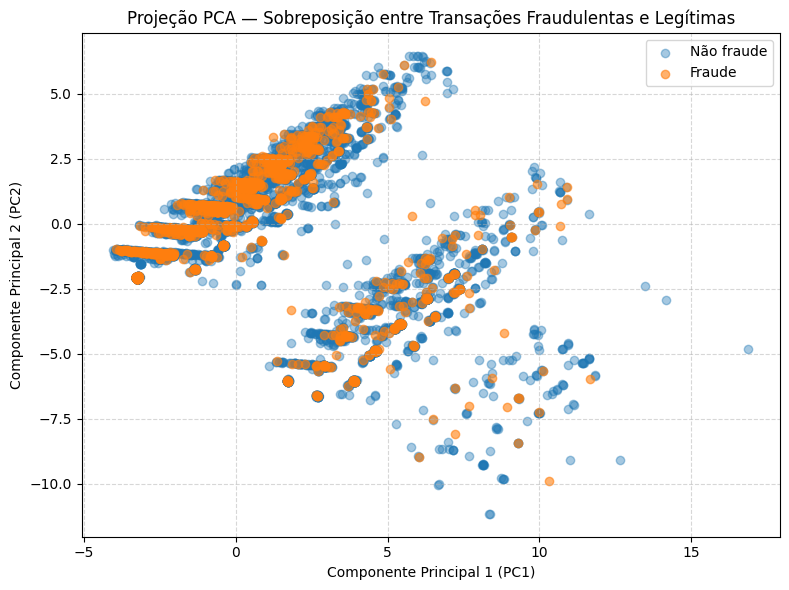

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# não fraude
plt.scatter(
    pca_df.loc[pca_df["target_fraude"] == 0, "PC1"],
    pca_df.loc[pca_df["target_fraude"] == 0, "PC2"],
    alpha=0.4,
    label="Não fraude"
)

# fraude
plt.scatter(
    pca_df.loc[pca_df["target_fraude"] == 1, "PC1"],
    pca_df.loc[pca_df["target_fraude"] == 1, "PC2"],
    alpha=0.6,
    label="Fraude"
)

plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Projeção PCA — Sobreposição entre Transações Fraudulentas e Legítimas")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


<small>***Comentários Letícia:** A projeção dos dados nos dois primeiros componentes principais evidencia uma forte sobreposição entre transações fraudulentas e legítimas. Observa-se que ambas as classes ocupam praticamente as mesmas regiões do espaço projetado, sem fronteiras visuais claras ou clusters bem definidos associados à fraude. Esse padrão indica que, mesmo após a engenharia de features, o problema apresenta baixa separabilidade geométrica no espaço das variáveis disponíveis, o que sugere que modelos supervisionados podem enfrentar limitações naturais para discriminar as classes com alto desempenho.*</small>


### 2.4.3 Implicações para a etapa de modelagem

- A análise de separabilidade realizada nas etapas anteriores indica que as classes de transações fraudulentas e legítimas apresentam forte sobreposição no espaço de features, mesmo após a engenharia de variáveis. A ausência de fronteiras geométricas claras sugere que o problema não possui uma estrutura facilmente separável, o que limita o potencial de desempenho de modelos supervisionados tradicionais.

- Diante desse cenário, a etapa de modelagem deve priorizar algoritmos capazes de lidar com baixa separabilidade e ruído, bem como métricas adequadas para avaliação em contextos desbalanceados. Além disso, torna-se fundamental analisar os modelos não apenas sob a ótica de desempenho global, mas também considerando estabilidade, interpretabilidade e impacto operacional, especialmente em relação ao risco de falsos positivos.

- Assim, a modelagem será conduzida com foco em modelos interpretáveis, avaliação criteriosa por validação cruzada e análise de trade-offs, reconhecendo desde o início as limitações impostas pelo espaço de dados disponível.


# 3. MODELO 1 - REGRESSÃO LOGÍSTICA

## 3.1 Objetivo do Modelo

A Regressão Logística é utilizada neste projeto como o primeiro modelo da etapa de modelagem, atuando como um **baseline interpretável** para o problema de detecção de fraude. Seu principal objetivo é avaliar se o conjunto de features engenheiradas nas etapas anteriores é capaz de capturar o sinal de fraude de forma consistente, transparente e estatisticamente controlada.

Por se tratar de um problema de classificação binária com classes desbalanceadas, a avaliação deste modelo será baseada principalmente em métricas sensíveis à classe minoritária. A **PR-AUC (Average Precision)** será adotada como métrica principal, por refletir melhor o desempenho do modelo na identificação de fraudes, enquanto **Precision, Recall e F1-score** serão utilizadas como métricas complementares para análise do trade-off entre falsos positivos e falsos negativos. A **ROC-AUC** será considerada como métrica de referência adicional.

Além de servir como ponto de comparação para os modelos seguintes, a Regressão Logística permite interpretar diretamente o impacto das variáveis sobre a probabilidade de ocorrência de fraude, o que é particularmente relevante em um contexto operacional que exige decisões explicáveis e auditáveis.


## 3.2 Construção do pipeline

### 3.2.1 Pré-processamento

In [161]:
# separar colunas numéricas e categóricas a partir de X
categorical_features = X.select_dtypes(include=["category", "object"]).columns.tolist()
numerical_features = X.select_dtypes(exclude=["category", "object"]).columns.tolist()

print("Features categóricas:", categorical_features)
print("Quantidade:", len(categorical_features))

print("\nFeatures numéricas:", numerical_features)
print("Quantidade:", len(numerical_features))

# pipeline para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# pipeline para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# column transformer unificando os pré-processamentos
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

print("\nOK — pré-processamento definido (numérico + categórico) e pronto para integração no pipeline.")

Features categóricas: ['temp_faixa', 'valor_transacao_faixa', 'periodo_dia']
Quantidade: 3

Features numéricas: ['hora_transacao', 'dia_semana', 'fim_de_semana', 'tempo_vida_cartao_dias', 'tempo_desde_ultima_transacao_min', 'tempo_desde_ultima_transacao_horas', 'uso_intervalo_curto', 'qtd_transacoes_dia', 'qtd_transacoes_24h', 'uso_intenso_24h', 'linha_repetida', 'dispositivo_repetido', 'qtd_linhas_distintas_dia', 'qtd_dispositivos_distintos_dia', 'idade_suspeita', 'feriado_bin', 'feriado_nao_mapeado', 'sentido_ida', 'clima_adverso', 'cartao_qtd_transacoes', 'cartao_dias_ativos', 'cartao_media_transacoes_por_dia', 'cartao_qtd_linhas_distintas', 'cartao_qtd_dispositivos_distintos', 'cartao_qtd_motoristas_distintos', 'cartao_valor_transacao_mean', 'cartao_valor_transacao_std', 'cartao_pct_integracao', 'cartao_pct_feriado', 'cartao_pct_intervalo_curto', 'valor_vs_media_cartao', 'valor_zscore_cartao', 'valor_outlier_cartao', 'uso_acima_media_dia_cartao']
Quantidade: 34

OK — pré-processame

<small>***Comentários Letícia:** Nesta etapa, organizei o pré-processamento separando variáveis numéricas e categóricas, aplicando apenas os tratamentos necessários para cada grupo. A construção do `ColumnTransformer` garante que essas transformações sejam executadas dentro do pipeline, evitando vazamento de dados e mantendo consistência ao longo da modelagem.*</small>

### 3.2.2 Padronização (scaler) onde faz sentido

In [162]:
# atualizar o pipeline numérico para incluir o scaler
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# reconstruir o column transformer com o scaler aplicado apenas às numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

print("OK — padronização incluída no pipeline numérico para a Regressão Logística.")

OK — padronização incluída no pipeline numérico para a Regressão Logística.


<small>***Comentários Letícia:** Optei por incluir a padronização apenas nas variáveis numéricas, pois a Regressão Logística é sensível à escala dos dados. Essa normalização evita que features com maior magnitude tenham peso desproporcional no ajuste do modelo, mantendo uma interpretação mais estável dos coeficientes. O scaler foi incorporado ao pipeline para garantir que o ajuste ocorra somente com dados de treino.*</small>


### 3.2.3 Tratamento de desbalanceamento

In [163]:
# configuração do estimador com ponderação automática das classes
log_reg = LogisticRegression(
    class_weight="balanced",
    random_state=SEED,
    max_iter=1000,
    n_jobs=None
)

print("OK — tratamento de desbalanceamento definido via class_weight='balanced' para a Regressão Logística.")


OK — tratamento de desbalanceamento definido via class_weight='balanced' para a Regressão Logística.


<small>***Comentários Letícia:** Optei por utilizar o parâmetro `class_weight='balanced'` para lidar com o desbalanceamento da variável alvo, ajustando o peso das classes de forma proporcional à sua frequência. Essa abordagem permite que o modelo dê maior atenção à classe de fraude sem alterar artificialmente a distribuição dos dados, mantendo uma avaliação mais fiel do desempenho.*</small>

### 3.2.4 Definição do estimador e hiperparâmetros iniciais

In [164]:
log_reg = LogisticRegression(
    solver="lbfgs",
    max_iter=2000,
    class_weight="balanced",
    random_state=SEED
)

# pipeline completo: pré-processamento + modelo
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", log_reg)
])

print("OK — estimador definido e pipeline da Regressão Logística construído.")
print("Hiperparâmetros iniciais:", log_reg.get_params())

OK — estimador definido e pipeline da Regressão Logística construído.
Hiperparâmetros iniciais: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 2000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


<small>***Comentários Letícia:** Defini um conjunto inicial de hiperparâmetros conservador e montei o pipeline completo com pré-processamento e modelo. Assim, garanto que treino e validação usem exatamente o mesmo fluxo, o que deixa a comparação com os demais modelos mais justa e reprodutível.*</small>


## 3.3 Avaliação (validação cruzada)

### 3.3.1 Definir estratégia de validação cruzada

In [165]:
from sklearn.model_selection import StratifiedKFold

# número de partições da validação cruzada
n_splits = 5

# validação cruzada estratificada para preservar a proporção da classe de fraude
cv_strategy = StratifiedKFold(
    n_splits=n_splits,
    shuffle=True,
    random_state=SEED
)

print("Validação cruzada definida.")
print("Número de folds:", n_splits)
print("Estratégia: StratifiedKFold (estratificada, com shuffle e seed fixa).")

Validação cruzada definida.
Número de folds: 5
Estratégia: StratifiedKFold (estratificada, com shuffle e seed fixa).


<small>***Comentários Letícia:** Defini a validação cruzada estratificada para avaliar o modelo de forma mais estável, preservando a proporção de fraudes em cada partição. Essa estratégia reduz o risco de conclusões baseadas em um único split e deixa a comparação entre modelos mais consistente.*</small>

### 3.3.2 Definir métricas oficiais do projeto

In [166]:
# métrica principal
primary_metric = "average_precision"  # PR-AUC

# métricas complementares
scoring_metrics = {
    "pr_auc": "average_precision",
    "roc_auc": "roc_auc",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1"
}

print("Métricas definidas para a avaliação:")
print("Métrica principal:", primary_metric)
print("Métricas complementares:")
for k, v in scoring_metrics.items():
    print(f"- {k}: {v}")

Métricas definidas para a avaliação:
Métrica principal: average_precision
Métricas complementares:
- pr_auc: average_precision
- roc_auc: roc_auc
- precision: precision
- recall: recall
- f1: f1


<small>***Comentários Letícia:** Escolhi a PR-AUC como métrica principal porque ela avalia diretamente a capacidade do modelo em priorizar corretamente as transações fraudulentas, o que é mais adequado em um cenário com classes desbalanceadas. Diferentemente da acurácia ou mesmo da ROC-AUC isolada, a PR-AUC é mais sensível ao comportamento da classe minoritária. As demais métricas foram mantidas como apoio para analisar os trade-offs entre falsos positivos e falsos negativos.*</small>


### 3.3.3 Executar a validação cruzada e registrar resultados

In [167]:
# execução da validação cruzada e registro dos resultados

cv_results = cross_validate(
    logreg_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring_metrics,
    return_train_score=False
)

# organizar resultados em DataFrame
cv_results_df = (
    pd.DataFrame(cv_results)
    .drop(columns=["fit_time", "score_time"])
    .rename(columns=lambda c: c.replace("test_", ""))
)

# calcular média e desvio padrão
cv_summary = cv_results_df.agg(["mean", "std"]).T.round(4)

print("Resultados da validação cruzada — Regressão Logística")
display(cv_summary)

Resultados da validação cruzada — Regressão Logística


,mean,std
pr_auc,0.1041,0.0020
roc_auc,0.5108,0.0118
precision,0.0988,0.0031
recall,0.4710,0.0353
f1,0.1633,0.0063


<small>***Comentários Letícia:** A validação cruzada indicou que a Regressão Logística apresenta desempenho limitado neste problema, com PR-AUC e ROC-AUC próximas do patamar mínimo esperado, mas com resultados consistentes entre os folds. O recall relativamente mais alto, acompanhado de uma precisão baixa, reflete o efeito do balanceamento das classes e evidencia um volume elevado de falsos positivos. Esses resultados reforçam o papel do modelo como baseline interpretável para comparação com abordagens mais flexíveis nas próximas etapas.*</small>

## 3.4 Treino final e avaliação no holdout

### 3.4.1 Ajustar pipeline no treino completo

In [168]:
logreg_pipeline.fit(X_train, y_train)

print("OK — pipeline da Regressão Logística ajustado com sucesso no conjunto de treino.")

OK — pipeline da Regressão Logística ajustado com sucesso no conjunto de treino.


### 3.4.2 Avaliar no teste com métricas e matriz de confusão

In [169]:
# avaliação do modelo no conjunto de teste (holdout)

# probabilidades previstas para a classe positiva (fraude)
y_test_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

# predição de classe com threshold padrão (0.5)
y_test_pred = (y_test_proba >= 0.5).astype(int)

# cálculo das métricas no holdout
holdout_results = {
    "pr_auc": average_precision_score(y_test, y_test_proba),
    "roc_auc": roc_auc_score(y_test, y_test_proba),
    "precision": precision_score(y_test, y_test_pred, zero_division=0),
    "recall": recall_score(y_test, y_test_pred, zero_division=0),
    "f1": f1_score(y_test, y_test_pred, zero_division=0)
}

holdout_df = (
    pd.DataFrame.from_dict(holdout_results, orient="index", columns=["valor"])
    .round(4)
)

print("Resultados no conjunto de teste (holdout) — Regressão Logística")
display(holdout_df)

# matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(
    cm,
    index=["Real 0", "Real 1"],
    columns=["Pred 0", "Pred 1"]
)

print("\nMatriz de confusão (threshold = 0.5):")
display(cm_df)

Resultados no conjunto de teste (holdout) — Regressão Logística


,valor
pr_auc,0.1068
roc_auc,0.5217
precision,0.1043
recall,0.4821
f1,0.1715



Matriz de confusão (threshold = 0.5):


,Pred 0,Pred 1
Real 0,2983,2430
Real 1,304,283


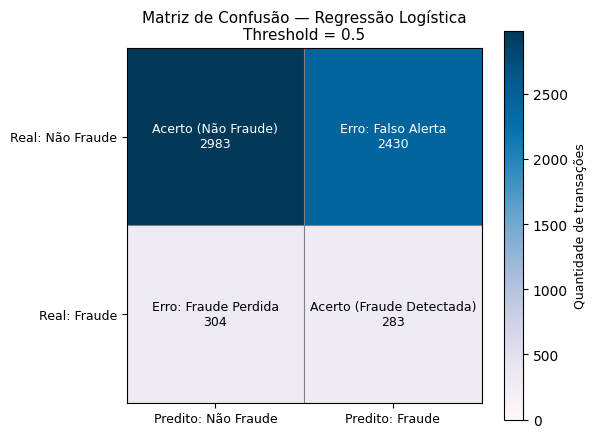

In [170]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4.8))

plt.imshow(cm, cmap="PuBu", vmin=0)

plt.title("Matriz de Confusão — Regressão Logística\nThreshold = 0.5", fontsize=11)

plt.xticks(
    [0, 1],
    ["Predito: Não Fraude", "Predito: Fraude"],
    fontsize=9
)
plt.yticks(
    [0, 1],
    ["Real: Não Fraude", "Real: Fraude"],
    fontsize=9
)

cell_text = [
    ["Acerto (Não Fraude)", "Erro: Falso Alerta"],
    ["Erro: Fraude Perdida", "Acerto (Fraude Detectada)"]
]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i,
            f"{cell_text[i][j]}\n{cm[i, j]}",
            ha="center",
            va="center",
            fontsize=9,
            color="white" if cm[i, j] > cm.max() * 0.5 else "black"
        )

plt.gca().set_xticks(np.arange(-.5, 2, 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, 2, 1), minor=True)
plt.grid(which="minor", color="gray", linestyle="-", linewidth=0.8)
plt.tick_params(which="minor", bottom=False, left=False)

cbar = plt.colorbar()
cbar.set_label("Quantidade de transações", fontsize=9)

plt.tight_layout()
plt.show()

<small>***Comentários Letícia:** Os resultados no conjunto de teste confirmam que a Regressão Logística apresenta desempenho limitado para este problema, com baixa capacidade de separar fraudes de transações legítimas. Apesar de recuperar uma parcela relevante das fraudes, o modelo gera um volume elevado de falsos positivos, o que compromete sua viabilidade operacional. Esse comportamento reforça o papel da Regressão Logística como um baseline interpretável e evidencia a necessidade de modelos mais flexíveis nas próximas etapas.*</small>

> Antes de encerrar a Regressão Logística, optei por realizar alguns testes adicionais e controlados com o objetivo de extrair o máximo desempenho possível deste baseline. Esses ajustes não têm como finalidade “forçar” o modelo a atingir níveis de performance incompatíveis com sua natureza, mas sim verificar, de forma criteriosa, se pequenas variações de regularização e decisão poderiam melhorar marginalmente os resultados. Essa abordagem permite avaliar os limites reais do modelo e fundamentar, com maior segurança, a necessidade de avançar para modelos mais flexíveis nas etapas seguintes.


### 3.4.3 Ajuste do hiperparâmetro C (regularização)

In [171]:
from sklearn.model_selection import cross_validate

# valores candidatos de C para teste controlado
C_values = [0.1, 1.0, 10.0]

results_C = []

for C in C_values:
    log_reg_c = LogisticRegression(
        solver="lbfgs",
        max_iter=2000,
        class_weight="balanced",
        random_state=SEED,
        C=C
    )

    pipeline_c = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", log_reg_c)
    ])

    cv_result = cross_validate(
        pipeline_c,
        X_train,
        y_train,
        cv=cv_strategy,
        scoring=scoring_metrics,
        return_train_score=False
    )

    summary = {
        "C": C,
        "pr_auc_mean": cv_result["test_pr_auc"].mean(),
        "pr_auc_std": cv_result["test_pr_auc"].std(),
        "roc_auc_mean": cv_result["test_roc_auc"].mean(),
        "precision_mean": cv_result["test_precision"].mean(),
        "recall_mean": cv_result["test_recall"].mean(),
        "f1_mean": cv_result["test_f1"].mean(),
    }

    results_C.append(summary)

results_C_df = pd.DataFrame(results_C).round(4)

print("Resultados da validação cruzada para diferentes valores de C — Regressão Logística")
display(results_C_df)

Resultados da validação cruzada para diferentes valores de C — Regressão Logística


,C,pr_auc_mean,pr_auc_std,roc_auc_mean,precision_mean,recall_mean,f1_mean
0,0.1,0.1039,0.0017,0.5103,0.0992,0.4749,0.1641
1,1.0,0.1041,0.0018,0.5108,0.0988,0.4710,0.1633
2,10.0,0.1042,0.0019,0.5108,0.0992,0.4727,0.1639


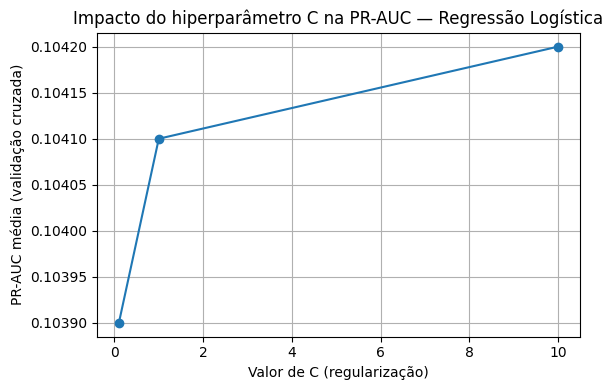

In [172]:
import matplotlib.pyplot as plt

C_vals = results_C_df["C"]
pr_auc_vals = results_C_df["pr_auc_mean"]

plt.figure(figsize=(6, 4))
plt.plot(C_vals, pr_auc_vals, marker="o")
plt.xlabel("Valor de C (regularização)")
plt.ylabel("PR-AUC média (validação cruzada)")
plt.title("Impacto do hiperparâmetro C na PR-AUC — Regressão Logística")
plt.grid(True)
plt.tight_layout()
plt.show()

<small>***Comentários Letícia:** A análise gráfica confirma que a variação do hiperparâmetro C produz apenas mudanças marginais na PR-AUC, sem alterar de forma relevante o desempenho do modelo. A curva praticamente plana reforça que a limitação observada não está no nível de regularização, mas na capacidade da Regressão Logística de capturar padrões mais complexos presentes nos dados.*</small>

### 3.4.4 Ajuste de threshold

In [173]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# obter probabilidades out-of-fold no conjunto de treino
y_train_proba_oof = cross_val_predict(
    logreg_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    method="predict_proba"
)[:, 1]

# calcular curva precision-recall
precision, recall, thresholds = precision_recall_curve(y_train, y_train_proba_oof)

# organizar resultados em DataFrame
threshold_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

display(threshold_df.head())
print("OK — thresholds avaliados com base em probabilidades out-of-fold.")


,threshold,precision,recall
0,0.000181,0.097833,1.0
1,0.000181,0.097837,1.0
2,0.000192,0.097841,1.0
3,0.000363,0.097846,1.0
4,0.000407,0.097850,1.0


OK — thresholds avaliados com base em probabilidades out-of-fold.


<small>***Comentários Letícia:** A análise dos thresholds mostra que, para atingir recall elevado, o modelo precisa operar com limiares muito baixos, resultando em precisão próxima à taxa base de fraude. Isso indica que as probabilidades previstas não apresentam separação clara entre fraudes e transações legítimas, reforçando que o ajuste de threshold, por si só, não é suficiente para melhorar significativamente o desempenho do modelo.*</small>

### 3.4.5 Avaliação de desempenho

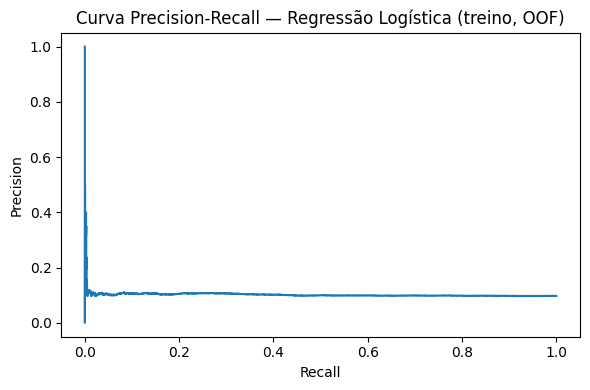

In [174]:
# Curva Precision-Recall

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# calcular curva Precision-Recall a partir das probabilidades out-of-fold
precision, recall, _ = precision_recall_curve(y_train, y_train_proba_oof)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall — Regressão Logística (treino, OOF)")
plt.tight_layout()
plt.show()


<small>***Comentários Letícia:** A curva Precision–Recall evidencia que a Regressão Logística apresenta capacidade limitada de ranqueamento, mantendo a precisão próxima à taxa base de fraude mesmo para diferentes níveis de recall. O formato quase plano da curva indica baixa separação entre as classes, confirmando que o modelo não consegue priorizar fraudes de forma eficiente. Esse resultado consolida a Regressão Logística como um baseline interpretável, mas insuficiente para atender às exigências do problema.*</small>

## 3.5 Interpretabilidade

### 3.5.1 Extrair nomes pós-encoding e coeficientes

In [175]:
# acessar o modelo treinado
log_reg_model = logreg_pipeline.named_steps["model"]

# recuperar nomes das features após o pré-processamento
feature_names_num = numerical_features

feature_names_cat = (
    logreg_pipeline
    .named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

feature_names = feature_names_num + feature_names_cat

# extrair coeficientes
coeficientes = log_reg_model.coef_[0]

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coeficiente": coeficientes
    })
    .sort_values("coeficiente", key=abs, ascending=False)
    .reset_index(drop=True)
)

print("Coeficientes extraídos com sucesso.")
display(coef_df.head(10))

Coeficientes extraídos com sucesso.


,feature,coeficiente
0,cartao_qtd_transacoes,0.409120
1,qtd_linhas_distintas_dia,-0.361383
2,cartao_valor_transacao_mean,-0.301083
3,cartao_valor_transacao_std,0.233570
4,qtd_transacoes_dia,0.217923
5,cartao_dias_ativos,-0.217681
6,cartao_qtd_motoristas_distintos,-0.170990
7,temp_faixa_15-20,-0.134891
8,valor_transacao_faixa_alto,-0.099199
9,uso_intenso_24h,-0.089235


<small>***Comentários Letícia:** A extração dos coeficientes permitiu identificar quais variáveis exercem maior influência na decisão da Regressão Logística. Observa-se que features ligadas a volume e padrão de uso do cartão aparecem entre as mais relevantes, enquanto variáveis categóricas específicas têm impacto menor. Apesar de a leitura dos sinais ser consistente do ponto de vista interpretativo, a magnitude e a combinação desses efeitos não foram suficientes para gerar boa capacidade discriminativa no modelo.*</small>

### 3.5.2 Ranking e leitura de sinais

In [176]:
# separar sinais positivos e negativos
top_positivos = coef_df.sort_values("coeficiente", ascending=False).head(10)
top_negativos = coef_df.sort_values("coeficiente", ascending=True).head(10)

print("Top 10 sinais POSITIVOS (aumentam probabilidade de fraude):")
display(top_positivos)

print("\nTop 10 sinais NEGATIVOS (reduzem probabilidade de fraude):")
display(top_negativos)


Top 10 sinais POSITIVOS (aumentam probabilidade de fraude):


,feature,coeficiente
0,cartao_qtd_transacoes,0.409120
3,cartao_valor_transacao_std,0.233570
4,qtd_transacoes_dia,0.217923
10,periodo_dia_tarde,0.088697
11,qtd_dispositivos_distintos_dia,0.078747
14,uso_acima_media_dia_cartao,0.064637
15,temp_faixa_20-25,0.057633
16,uso_intervalo_curto,0.052473
17,temp_faixa_>30,0.050731
18,valor_transacao_faixa_medio,0.045337



Top 10 sinais NEGATIVOS (reduzem probabilidade de fraude):


,feature,coeficiente
1,qtd_linhas_distintas_dia,-0.361383
2,cartao_valor_transacao_mean,-0.301083
5,cartao_dias_ativos,-0.217681
6,cartao_qtd_motoristas_distintos,-0.170990
7,temp_faixa_15-20,-0.134891
8,valor_transacao_faixa_alto,-0.099199
9,uso_intenso_24h,-0.089235
12,cartao_qtd_dispositivos_distintos,-0.068830
13,periodo_dia_noite,-0.065779
19,periodo_dia_madrugada,-0.045165


<small>***Comentários Letícia:** O ranking dos coeficientes mostra que aumentos na probabilidade de fraude estão associados, principalmente, a maior volume de transações, maior variabilidade de valores e padrões de uso acima da média do próprio cartão. Por outro lado, sinais negativos aparecem ligados a comportamentos mais estáveis e recorrentes, como maior diversidade de linhas, maior tempo de uso do cartão e médias de valor mais consistentes. Essa leitura é coerente com a lógica do problema, mas reforça que, isoladamente, esses sinais não se combinam de forma suficiente para uma separação eficaz entre fraudes e não fraudes.*</small>

## 3.6 Insights Finais do Modelo


- A Regressão Logística cumpriu adequadamente seu papel como baseline interpretável para o problema de detecção de fraude. O modelo foi capaz de identificar sinais coerentes do ponto de vista comportamental, especialmente relacionados a volume de uso, variabilidade de valores e padrões atípicos em relação ao histórico do próprio cartão.

- No entanto, tanto a validação cruzada quanto a avaliação no conjunto de teste mostraram desempenho limitado, com PR-AUC próxima à taxa base de fraude e baixa capacidade de ranqueamento das transações. Os testes adicionais de regularização e ajuste de threshold confirmaram que essas limitações não estão associadas à escolha de hiperparâmetros, mas à natureza linear do modelo frente a um problema que apresenta relações mais complexas e interações não lineares entre as features.

- Dessa forma, a Regressão Logística se mostrou valiosa para entendimento inicial do problema e para validação da engenharia de features, mas insuficiente para atender aos requisitos de desempenho esperados em um cenário operacional de detecção de fraude. Esses resultados justificam, de forma técnica e fundamentada, a exploração de modelos mais flexíveis nas próximas etapas.


# 4. MODELO 2 - ÁRVORE DE DECISÃO

## 4.1 Objetivo do Modelo

A Árvore de Decisão é adotada como o segundo modelo do projeto com o objetivo de capturar **relações não lineares e interações entre variáveis** que a Regressão Logística não conseguiu representar adequadamente. Trata-se de um modelo naturalmente interpretável, capaz de expressar regras de decisão explícitas, o que é particularmente relevante em um contexto de fraude que exige transparência e justificativas claras.

Neste modelo, busca-se avaliar se a estrutura em forma de árvore consegue explorar melhor as combinações de padrões comportamentais já identificados na engenharia de features, melhorando a capacidade de ranqueamento das transações fraudulentas. A avaliação seguirá as mesmas métricas definidas anteriormente, com **PR-AUC como métrica principal**, complementada por precision, recall, F1-score e ROC-AUC, garantindo uma comparação justa com o baseline.

Os resultados da Árvore de Decisão permitirão analisar o trade-off entre **ganho de performance** e **controle de overfitting**, além de servir como ponte conceitual entre o baseline linear e modelos de conjunto mais robustos, que serão explorados na etapa seguinte.


## 4.2 Construção do pipeline

### 4.2.1 Pré-processamento

In [177]:
numeric_transformer_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer_tree = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor_tree = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_tree, numerical_features),
        ("cat", categorical_transformer_tree, categorical_features)
    ],
    remainder="drop"
)

print("OK — pré-processamento definido para a Árvore de Decisão (sem padronização).")

OK — pré-processamento definido para a Árvore de Decisão (sem padronização).


<small>***Comentários Letícia:** Para a Árvore de Decisão, mantive apenas imputação e codificação das variáveis categóricas, sem aplicar padronização. Esse tipo de modelo não é sensível à escala dos dados, o que permite um pipeline mais simples e alinhado à sua natureza baseada em regras.*</small>


### 4.2.2 Regularização explícita (anti-overfitting)

In [178]:
from sklearn.tree import DecisionTreeClassifier

# definição do estimador com restrições para controlar overfitting
decision_tree = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=50,
    min_samples_split=100,
    class_weight="balanced",
    random_state=SEED
)

# pipeline completo da Árvore de Decisão
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_tree),
    ("model", decision_tree)
])

print("OK — estimador da Árvore de Decisão definido com regularização explícita.")
print("Hiperparâmetros principais:",
      {
          "max_depth": decision_tree.max_depth,
          "min_samples_leaf": decision_tree.min_samples_leaf,
          "min_samples_split": decision_tree.min_samples_split
      })

OK — estimador da Árvore de Decisão definido com regularização explícita.
Hiperparâmetros principais: {'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 100}


<small>***Comentários Letícia:** Configurei a árvore com limites de profundidade e tamanhos mínimos de nós para reduzir overfitting e manter a interpretabilidade. A ideia é permitir que o modelo capture não linearidades, mas sem “memorizar” padrões específicos do treino.*</small>


## 4.3 Avaliação da Validação Cruzada

In [179]:
tree_cv_results = cross_validate(
    tree_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring_metrics,
    return_train_score=False
)

tree_cv_df = (
    pd.DataFrame(tree_cv_results)
    .drop(columns=["fit_time", "score_time"])
    .rename(columns=lambda c: c.replace("test_", ""))
)

tree_cv_summary = tree_cv_df.agg(["mean", "std"]).T.round(4)

print("Resultados da validação cruzada — Árvore de Decisão")
display(tree_cv_summary)

Resultados da validação cruzada — Árvore de Decisão


,mean,std
pr_auc,0.0982,0.0019
roc_auc,0.5002,0.0131
precision,0.0960,0.0063
recall,0.7124,0.2903
f1,0.1654,0.0257


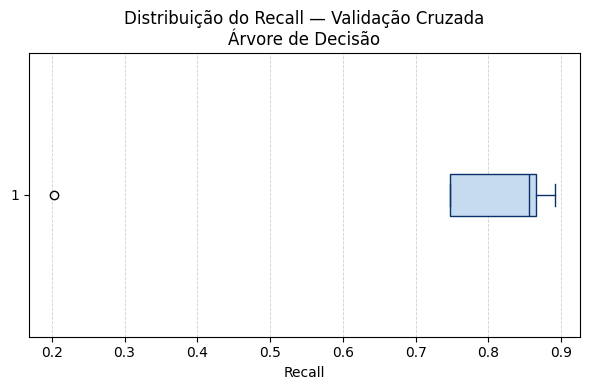

In [180]:
import matplotlib.pyplot as plt

recall_folds = tree_cv_df["recall"]

plt.figure(figsize=(6, 4))

plt.boxplot(
    recall_folds,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="#c6dbef", edgecolor="#08306b"),
    medianprops=dict(color="#08306b"),
    whiskerprops=dict(color="#08306b"),
    capprops=dict(color="#08306b")
)

plt.xlabel("Recall")
plt.title("Distribuição do Recall — Validação Cruzada\nÁrvore de Decisão")

plt.grid(axis="x", linestyle="--", linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.show()

<small>***Comentários Letícia:** Apesar do recall médio elevado, a validação cruzada revelou grande variabilidade desse indicador entre os folds. Essa instabilidade sugere que a Árvore de Decisão é sensível à partição dos dados, capturando padrões distintos conforme o conjunto de treino, o que limita sua confiabilidade operacional.*</small>

## 4.4 Treino final e holdout

In [181]:
# ajustar o pipeline completo no conjunto de treino
tree_pipeline.fit(X_train, y_train)

# probabilidades previstas no conjunto de teste
y_test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]

# predição com threshold padrão
y_test_pred_tree = (y_test_proba_tree >= 0.5).astype(int)

# métricas no holdout
tree_holdout_results = {
    "pr_auc": average_precision_score(y_test, y_test_proba_tree),
    "roc_auc": roc_auc_score(y_test, y_test_proba_tree),
    "precision": precision_score(y_test, y_test_pred_tree, zero_division=0),
    "recall": recall_score(y_test, y_test_pred_tree, zero_division=0),
    "f1": f1_score(y_test, y_test_pred_tree, zero_division=0)
}

tree_holdout_df = (
    pd.DataFrame.from_dict(tree_holdout_results, orient="index", columns=["valor"])
    .round(4)
)

print("Resultados no conjunto de teste (holdout) — Árvore de Decisão")
display(tree_holdout_df)

# matriz de confusão
cm_tree = confusion_matrix(y_test, y_test_pred_tree)

cm_tree_df = pd.DataFrame(
    cm_tree,
    index=["Real: Não Fraude", "Real: Fraude"],
    columns=["Predito: Não Fraude", "Predito: Fraude"]
)

print("\nMatriz de confusão — Árvore de Decisão (threshold = 0.5)")
display(cm_tree_df)

Resultados no conjunto de teste (holdout) — Árvore de Decisão


,valor
pr_auc,0.1003
roc_auc,0.5075
precision,0.1063
recall,0.2675
f1,0.1521



Matriz de confusão — Árvore de Decisão (threshold = 0.5)


,Predito: Não Fraude,Predito: Fraude
Real: Não Fraude,4093,1320
Real: Fraude,430,157


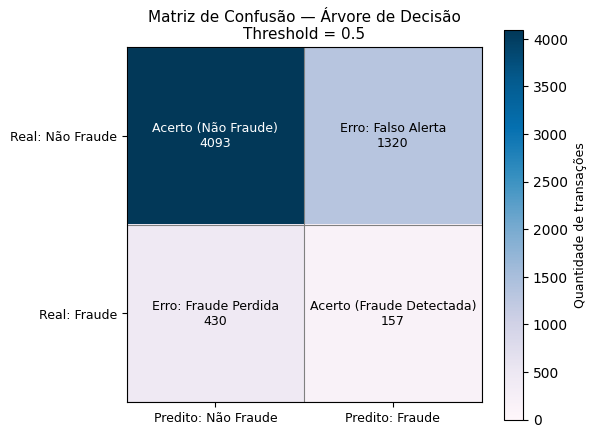

In [182]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4.8))

plt.imshow(cm_tree, cmap="PuBu", vmin=0)

plt.title("Matriz de Confusão — Árvore de Decisão\nThreshold = 0.5", fontsize=11)

plt.xticks(
    [0, 1],
    ["Predito: Não Fraude", "Predito: Fraude"],
    fontsize=9
)
plt.yticks(
    [0, 1],
    ["Real: Não Fraude", "Real: Fraude"],
    fontsize=9
)

cell_text = [
    ["Acerto (Não Fraude)", "Erro: Falso Alerta"],
    ["Erro: Fraude Perdida", "Acerto (Fraude Detectada)"]
]

for i in range(cm_tree.shape[0]):
    for j in range(cm_tree.shape[1]):
        plt.text(
            j, i,
            f"{cell_text[i][j]}\n{cm_tree[i, j]}",
            ha="center",
            va="center",
            fontsize=9,
            color="white" if cm_tree[i, j] > cm_tree.max() * 0.5 else "black"
        )

plt.gca().set_xticks(np.arange(-.5, 2, 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, 2, 1), minor=True)
plt.grid(which="minor", color="gray", linestyle="-", linewidth=0.8)
plt.tick_params(which="minor", bottom=False, left=False)

cbar = plt.colorbar()
cbar.set_label("Quantidade de transações", fontsize=9)

plt.tight_layout()
plt.show()

<small>***Comentários Letícia:** A avaliação no conjunto de teste mostrou que a Árvore de Decisão apresentou desempenho inferior ao esperado, com queda relevante no recall em relação à validação cruzada e métricas gerais próximas ao aleatório. A matriz de confusão evidencia que o modelo perdeu grande parte das fraudes e não conseguiu manter um padrão consistente de generalização. Esse resultado reforça o diagnóstico de alta variância observado anteriormente e indica que a árvore isolada não é adequada para o problema, mesmo com regularização explícita.*</small>


> Diante dos resultados obtidos, optei por não realizar novos ajustes de hiperparâmetros na Árvore de Decisão. Apesar de ajustes marginais terem sido considerados, o desempenho observado no holdout mostrou-se inferior ao do baseline, com evidências claras de alta variância e baixa capacidade de generalização. Esses resultados indicam que a limitação do modelo é estrutural, inerente ao uso de uma árvore isolada, e não decorrente de escolhas específicas de parâmetros. Assim, a decisão natural é avançar para um modelo de conjunto, como a Random Forest, cuja proposta é justamente reduzir variância e aumentar a robustez das previsões.


## 4.5 Interpretabilidade

In [183]:
# acessar o modelo treinado
tree_model = tree_pipeline.named_steps["model"]

# importância das features
importances = tree_model.feature_importances_

# recuperar nomes das features após o pré-processamento
feature_names_num = numerical_features

feature_names_cat = (
    tree_pipeline
    .named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

feature_names = feature_names_num + feature_names_cat

importance_df = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

print("Importâncias das features extraídas com sucesso.")
display(importance_df.head(10))

print("\nProfundidade efetiva da árvore:", tree_model.get_depth())
print("Número de folhas:", tree_model.get_n_leaves())

Importâncias das features extraídas com sucesso.


,feature,importance
0,tempo_vida_cartao_dias,0.246655
1,tempo_desde_ultima_transacao_min,0.135115
2,cartao_valor_transacao_mean,0.123476
3,valor_zscore_cartao,0.069866
4,periodo_dia_tarde,0.069857
5,hora_transacao,0.064202
6,temp_faixa_15-20,0.059991
7,valor_vs_media_cartao,0.046994
8,cartao_media_transacoes_por_dia,0.043012
9,cartao_dias_ativos,0.039916



Profundidade efetiva da árvore: 6
Número de folhas: 19


<small>***Comentários Letícia:** As importâncias das features indicam que a Árvore de Decisão se apoia fortemente em poucas variáveis temporais e de histórico do cartão, como tempo de vida e tempo desde a última transação. Embora essas variáveis façam sentido do ponto de vista do problema, a concentração excessiva em poucos sinais ajuda a explicar a instabilidade observada, já que pequenas mudanças nos dados podem alterar significativamente a estrutura da árvore.*</small>


## 4.6 Insights Finais do Modelo

- A Árvore de Decisão apresentou capacidade de capturar relações não lineares entre as variáveis, evidenciada pelo recall elevado em alguns folds da validação cruzada e pela presença de regras de decisão coerentes com o domínio do problema. As variáveis mais relevantes estiveram associadas a características temporais e ao histórico de uso do cartão, o que indica que o modelo conseguiu explorar padrões comportamentais relevantes.

- Entretanto, os resultados mostraram alta variabilidade entre as partições e desempenho inferior no conjunto de teste, com métricas próximas ao aleatório. A instabilidade observada, mesmo com regularização explícita, sugere que a árvore isolada é altamente sensível à amostra utilizada para treinamento, limitando sua capacidade de generalização.

- Dessa forma, a Árvore de Decisão se mostrou inadequada como solução final para o problema de detecção de fraude, reforçando a necessidade de adotar modelos de conjunto capazes de reduzir variância e produzir decisões mais robustas, como a Random Forest, que será explorada na próxima etapa.


# 5. MODELO 3 - RANDOM FOREST

## 5.1 Objetivo do Modelo

A Random Forest é adotada como o terceiro modelo do projeto com o objetivo de superar as limitações observadas nos modelos anteriores, reduzindo a variância da Árvore de Decisão e capturando relações não lineares e interações complexas entre as variáveis de forma mais robusta. Por se tratar de um modelo de conjunto baseado em múltiplas árvores, espera-se maior estabilidade e melhor capacidade de generalização.

Neste contexto, a Random Forest será avaliada não apenas pelo ganho de desempenho em relação aos modelos anteriores, mas também pelo equilíbrio entre performance e interpretabilidade. Embora seja menos transparente que uma árvore isolada, o modelo ainda permite análise de importância de variáveis e padrões globais, o que mantém um nível adequado de explicabilidade para o problema.

A avaliação seguirá as mesmas métricas e metodologia aplicadas aos modelos anteriores, com **PR-AUC como métrica principal**, garantindo comparabilidade direta. O objetivo final é verificar se a redução de variância proporcionada pelo ensemble resulta em uma melhoria consistente na priorização de transações fraudulentas.


## 5.2 Construção do pipeline

### 5.2.1 Pré-processamento padronizado

In [184]:
numeric_transformer_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor_rf = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_rf, numerical_features),
        ("cat", categorical_transformer_rf, categorical_features)
    ],
    remainder="drop"
)

print("OK — pré-processamento definido para Random Forest (sem padronização).")


OK — pré-processamento definido para Random Forest (sem padronização).


<small>***Comentários Letícia:** Mantive o mesmo pré-processamento utilizado na Árvore de Decisão, com imputação e codificação categórica, sem aplicar padronização. Essa escolha preserva consistência entre os modelos baseados em árvores e garante que eventuais ganhos da Random Forest estejam ligados ao efeito do ensemble, e não a diferenças no tratamento dos dados.*</small>


### 5.2.2 Definição de hiperparâmetros base

In [185]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=50,
    min_samples_split=100,
    class_weight="balanced",
    n_jobs=-1,
    random_state=SEED
)

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor_rf),
    ("model", rf_model)
])

print("OK — Random Forest definida com hiperparâmetros base.")
print("Hiperparâmetros principais:", {
    "n_estimators": rf_model.n_estimators,
    "max_depth": rf_model.max_depth,
    "min_samples_leaf": rf_model.min_samples_leaf,
    "min_samples_split": rf_model.min_samples_split
})

OK — Random Forest definida com hiperparâmetros base.
Hiperparâmetros principais: {'n_estimators': 300, 'max_depth': None, 'min_samples_leaf': 50, 'min_samples_split': 100}


<small>***Comentários Letícia:** Defini um conjunto de hiperparâmetros base priorizando redução de variância e estabilidade, mantendo árvores suficientemente profundas, mas com restrições de tamanho mínimo dos nós. A ideia é permitir que o ensemble capture padrões não lineares sem repetir a instabilidade observada na árvore isolada.*</small>


## 5.3 Avaliação da validação cruzada

### 5.3.1 Avaliação com configuração base (baseline do ensemble)

In [186]:
rf_cv_results = cross_validate(
    rf_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring_metrics,
    return_train_score=False
)

rf_cv_df = (
    pd.DataFrame(rf_cv_results)
    .drop(columns=["fit_time", "score_time"])
    .rename(columns=lambda c: c.replace("test_", ""))
)

rf_cv_summary = rf_cv_df.agg(["mean", "std"]).T.round(4)

print("Resultados da validação cruzada — Random Forest")
display(rf_cv_summary)

Resultados da validação cruzada — Random Forest


,mean,std
pr_auc,0.0993,0.0058
roc_auc,0.5052,0.0147
precision,0.0980,0.0146
recall,0.1124,0.0081
f1,0.1046,0.0115


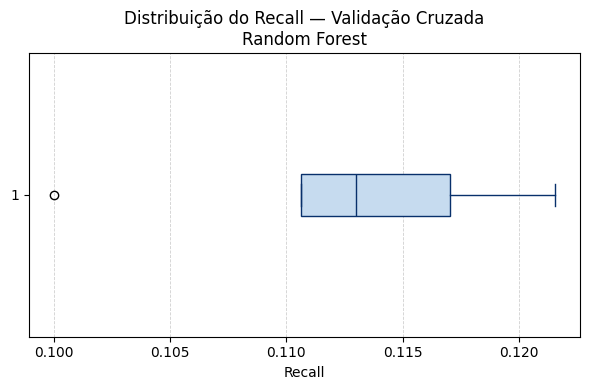

In [187]:
import matplotlib.pyplot as plt

recall_folds_rf = rf_cv_df["recall"]

plt.figure(figsize=(6, 4))

plt.boxplot(
    recall_folds_rf,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="#c6dbef", edgecolor="#08306b"),
    medianprops=dict(color="#08306b"),
    whiskerprops=dict(color="#08306b"),
    capprops=dict(color="#08306b")
)

plt.xlabel("Recall")
plt.title("Distribuição do Recall — Validação Cruzada\nRandom Forest")

plt.grid(axis="x", linestyle="--", linewidth=0.6, alpha=0.6)

plt.tight_layout()
plt.show()

<small>***Comentários Letícia:** A validação cruzada mostrou que a Random Forest apresentou desempenho médio ainda próximo ao aleatório, com PR-AUC baixa e recall reduzido. Apesar disso, observa-se menor variabilidade entre os folds em comparação com a Árvore de Decisão, indicando maior estabilidade do modelo. Os resultados sugerem que, embora o ensemble reduza a variância, o ganho de capacidade discriminativa ainda é limitado com a configuração atual.*</small>


> Após a avaliação inicial da Random Forest, decidi aprofundar a análise por meio de subetapas adicionais de validação cruzada. O objetivo desses testes é avaliar, de forma controlada, o impacto de ajustes específicos nos hiperparâmetros mais sensíveis do modelo, buscando extrair o máximo de desempenho possível sem comprometer a estabilidade, a interpretabilidade e a comparabilidade metodológica do projeto.


### 5.3.2 Ajuste controlado de pesos de classe (sensibilidade à fraude)

In [188]:
from sklearn.base import clone

class_weight_configs = {
    "balanced": "balanced",
    "fraude_x2": {0: 1, 1: 2},
    "fraude_x3": {0: 1, 1: 3}
}

rf_weight_results = []

for label, cw in class_weight_configs.items():
    rf_model_cw = clone(rf_model)
    rf_model_cw.set_params(class_weight=cw)

    rf_pipeline_cw = Pipeline(steps=[
        ("preprocessor", preprocessor_rf),
        ("model", rf_model_cw)
    ])

    cv_results = cross_validate(
        rf_pipeline_cw,
        X_train,
        y_train,
        cv=cv_strategy,
        scoring=scoring_metrics,
        return_train_score=False
    )

    cv_df = (
        pd.DataFrame(cv_results)
        .drop(columns=["fit_time", "score_time"])
        .rename(columns=lambda c: c.replace("test_", ""))
    )

    summary = cv_df.mean().to_dict()
    summary["configuracao"] = label

    rf_weight_results.append(summary)

rf_weight_df = pd.DataFrame(rf_weight_results).set_index("configuracao").round(4)

print("Resultados da validação cruzada — Ajuste de pesos de classe (Random Forest)")
display(rf_weight_df)

Resultados da validação cruzada — Ajuste de pesos de classe (Random Forest)


,pr_auc,roc_auc,precision,recall,f1
configuracao,,,,,
balanced,0.0993,0.5052,0.098,0.1124,0.1046
fraude_x2,0.1000,0.5041,0.000,0.0000,0.0000
fraude_x3,0.1001,0.5059,0.000,0.0000,0.0000


<small>***Comentários Letícia:** Testei ajustes controlados no peso da classe fraude para avaliar ganho de sensibilidade, mas as configurações mais agressivas levaram o modelo a não prever a classe minoritária. Como o PR-AUC permaneceu praticamente inalterado, concluí que o peso de classe não é o fator limitante do desempenho da Random Forest neste problema.*</small>


### 5.3.3 Ajuste controlado de granularidade das folhas

In [189]:
# Ajuste controlado de granularidade das folhas (min_samples_leaf) — Random Forest

from sklearn.base import clone

min_leaf_values = [50, 20, 10]

rf_leaf_results = []

for leaf in min_leaf_values:
    rf_model_leaf = clone(rf_model)
    rf_model_leaf.set_params(
        class_weight="balanced",
        min_samples_leaf=leaf
    )

    rf_pipeline_leaf = Pipeline(steps=[
        ("preprocessor", preprocessor_rf),
        ("model", rf_model_leaf)
    ])

    cv_results = cross_validate(
        rf_pipeline_leaf,
        X_train,
        y_train,
        cv=cv_strategy,
        scoring=scoring_metrics,
        return_train_score=False
    )

    cv_df = (
        pd.DataFrame(cv_results)
        .drop(columns=["fit_time", "score_time"])
        .rename(columns=lambda c: c.replace("test_", ""))
    )

    summary = cv_df.mean().to_dict()
    summary["min_samples_leaf"] = leaf

    rf_leaf_results.append(summary)

rf_leaf_df = pd.DataFrame(rf_leaf_results).set_index("min_samples_leaf").round(4)

print("Resultados da validação cruzada — Ajuste de min_samples_leaf (Random Forest)")
display(rf_leaf_df)

Resultados da validação cruzada — Ajuste de min_samples_leaf (Random Forest)


,pr_auc,roc_auc,precision,recall,f1
min_samples_leaf,,,,,
50,0.0993,0.5052,0.0980,0.1124,0.1046
20,0.1005,0.5052,0.1090,0.0762,0.0895
10,0.1006,0.5066,0.1015,0.0575,0.0731


<small>***Comentários Letícia:** Avaliei o impacto da redução do parâmetro `min_samples_leaf` para verificar se uma maior granularidade permitiria capturar padrões locais de fraude. Apesar de pequenas variações nas métricas, o PR-AUC permaneceu praticamente inalterado, enquanto o recall diminuiu à medida que o modelo ficou mais específico. Esses resultados indicam que a granularidade das folhas não é o fator limitante do desempenho da Random Forest neste conjunto de dados.*</small>


### 5.3.4 Comparação interna das configurações da Random Forest

In [190]:
rf_comparison_df = pd.concat(
    [
        rf_cv_summary.assign(configuracao="baseline").reset_index(),
        rf_weight_df.reset_index().assign(tipo="class_weight"),
        rf_leaf_df.reset_index().assign(tipo="min_samples_leaf")
    ],
    axis=0,
    ignore_index=True
)

print("Resumo comparativo das configurações testadas — Random Forest")
display(rf_comparison_df)


Resumo comparativo das configurações testadas — Random Forest


,index,mean,std,configuracao,pr_auc,roc_auc,precision,recall,f1,tipo,min_samples_leaf
0,pr_auc,0.0993,0.0058,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,roc_auc,0.5052,0.0147,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,precision,0.0980,0.0146,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,recall,0.1124,0.0081,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f1,0.1046,0.0115,baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,balanced,0.0993,0.5052,0.0980,0.1124,0.1046,class_weight,NaN
6,NaN,NaN,NaN,fraude_x2,0.1000,0.5041,0.0000,0.0000,0.0000,class_weight,NaN
7,NaN,NaN,NaN,fraude_x3,0.1001,0.5059,0.0000,0.0000,0.0000,class_weight,NaN
8,NaN,NaN,NaN,NaN,0.0993,0.5052,0.0980,0.1124,0.1046,min_samples_leaf,50.0
9,NaN,NaN,NaN,NaN,0.1005,0.5052,0.1090,0.0762,0.0895,min_samples_leaf,20.0


> Após a realização dos testes adicionais na Random Forest, optei por não aprofundar a consolidação dos resultados em uma única tabela comparativa. As avaliações já realizadas, tanto no baseline quanto nos ajustes controlados de pesos de classe e granularidade das folhas, mostraram de forma consistente que não houve ganho relevante ou estável de desempenho. Como as conclusões técnicas estavam claras a partir das análises individuais e devidamente documentadas, considerei que uma consolidação adicional teria caráter apenas estético, sem agregar valor analítico ao projeto. Dessa forma, mantive o foco na interpretação dos resultados e na tomada de decisão técnica, preservando clareza metodológica e objetividade.


## 5.4 Treino final e holdout

In [191]:
# ajuste final do pipeline no conjunto de treino
rf_pipeline.fit(X_train, y_train)

# probabilidades previstas no conjunto de teste
y_test_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# predição com threshold padrão
y_test_pred_rf = (y_test_proba_rf >= 0.5).astype(int)

# métricas no holdout
rf_holdout_results = {
    "pr_auc": average_precision_score(y_test, y_test_proba_rf),
    "roc_auc": roc_auc_score(y_test, y_test_proba_rf),
    "precision": precision_score(y_test, y_test_pred_rf, zero_division=0),
    "recall": recall_score(y_test, y_test_pred_rf, zero_division=0),
    "f1": f1_score(y_test, y_test_pred_rf, zero_division=0)
}

rf_holdout_df = (
    pd.DataFrame.from_dict(rf_holdout_results, orient="index", columns=["valor"])
    .round(4)
)

print("Resultados no conjunto de teste (holdout) — Random Forest")
display(rf_holdout_df)

# matriz de confusão
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

cm_rf_df = pd.DataFrame(
    cm_rf,
    index=["Real: Não Fraude", "Real: Fraude"],
    columns=["Predito: Não Fraude", "Predito: Fraude"]
)

print("\nMatriz de confusão — Random Forest (threshold = 0.5)")
display(cm_rf_df)

Resultados no conjunto de teste (holdout) — Random Forest


,valor
pr_auc,0.0990
roc_auc,0.4893
precision,0.0934
recall,0.0988
f1,0.0960



Matriz de confusão — Random Forest (threshold = 0.5)


,Predito: Não Fraude,Predito: Fraude
Real: Não Fraude,4850,563
Real: Fraude,529,58


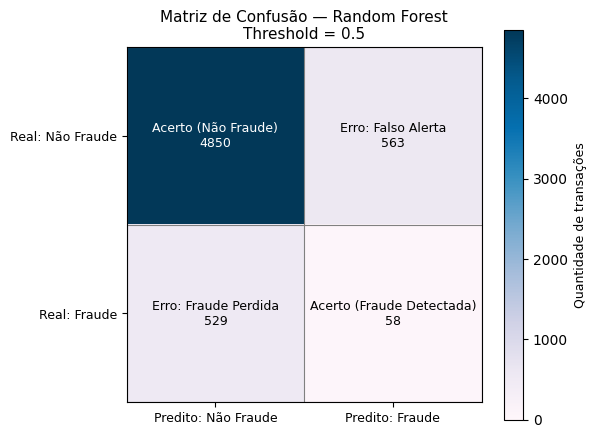

In [192]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4.8))

plt.imshow(cm_rf, cmap="PuBu", vmin=0)

plt.title("Matriz de Confusão — Random Forest\nThreshold = 0.5", fontsize=11)

plt.xticks(
    [0, 1],
    ["Predito: Não Fraude", "Predito: Fraude"],
    fontsize=9
)
plt.yticks(
    [0, 1],
    ["Real: Não Fraude", "Real: Fraude"],
    fontsize=9
)

cell_text = [
    ["Acerto (Não Fraude)", "Erro: Falso Alerta"],
    ["Erro: Fraude Perdida", "Acerto (Fraude Detectada)"]
]

for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        plt.text(
            j, i,
            f"{cell_text[i][j]}\n{cm_rf[i, j]}",
            ha="center",
            va="center",
            fontsize=9,
            color="white" if cm_rf[i, j] > cm_rf.max() * 0.5 else "black"
        )

plt.gca().set_xticks(np.arange(-.5, 2, 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, 2, 1), minor=True)
plt.grid(which="minor", color="gray", linestyle="-", linewidth=0.8)
plt.tick_params(which="minor", bottom=False, left=False)

cbar = plt.colorbar()
cbar.set_label("Quantidade de transações", fontsize=9)

plt.tight_layout()
plt.show()

<small>***Comentários Letícia:** A avaliação no conjunto de teste confirmou o comportamento observado na validação cruzada. A Random Forest apresentou métricas próximas ao aleatório, com baixa capacidade de priorizar transações fraudulentas e desempenho inferior ao baseline em termos de PR-AUC. A matriz de confusão evidencia que o modelo identificou apenas uma pequena parcela das fraudes, mesmo mantendo uma taxa moderada de falsos alertas. Esse resultado reforça que, apesar da maior estabilidade do ensemble, o limite de desempenho está associado à baixa separabilidade das classes com as variáveis disponíveis, e não à escolha do algoritmo ou de hiperparâmetros.*</small>


## 5.5 Interpretabilidade

In [193]:
# acessar o modelo treinado
rf_model_fitted = rf_pipeline.named_steps["model"]

# importâncias das features
rf_importances = rf_model_fitted.feature_importances_

# nomes das features após o pré-processamento
feature_names_num = numerical_features

feature_names_cat = (
    rf_pipeline
    .named_steps["preprocessor"]
    .named_transformers_["cat"]
    .named_steps["encoder"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

feature_names_rf = feature_names_num + feature_names_cat

rf_importance_df = (
    pd.DataFrame({
        "feature": feature_names_rf,
        "importance": rf_importances
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

print("Importâncias das features extraídas com sucesso — Random Forest")
display(rf_importance_df.head(15))


Importâncias das features extraídas com sucesso — Random Forest


,feature,importance
0,tempo_vida_cartao_dias,0.132178
1,tempo_desde_ultima_transacao_horas,0.091645
2,tempo_desde_ultima_transacao_min,0.089019
3,hora_transacao,0.071399
4,cartao_pct_integracao,0.057175
5,valor_zscore_cartao,0.054266
6,cartao_valor_transacao_std,0.053067
7,cartao_valor_transacao_mean,0.049831
8,dia_semana,0.049468
9,valor_vs_media_cartao,0.045825


<small>***Comentários Letícia:** As importâncias da Random Forest reforçam o padrão observado nos modelos anteriores, com destaque para variáveis temporais e de histórico do cartão, como tempo de vida, tempo desde a última transação e estatísticas de valor. A recorrência desses mesmos sinais em diferentes algoritmos indica que o modelo está explorando informações plausíveis do domínio, mas também evidencia que essas variáveis não oferecem separação suficiente para distinguir fraudes de forma consistente.*</small>


## 5.6 Insights Finais do Modelo

- A Random Forest foi explorada como uma tentativa de superar as limitações observadas nos modelos anteriores, principalmente a alta variância da Árvore de Decisão e a incapacidade de captura de não linearidades da Regressão Logística. Apesar da maior estabilidade proporcionada pelo ensemble, os resultados mostraram desempenho próximo ao aleatório tanto na validação cruzada quanto no conjunto de teste.

- Os testes adicionais realizados nesta etapa, incluindo ajustes controlados de pesos de classe e granularidade das folhas, não produziram ganhos consistentes em PR-AUC ou capacidade de ranqueamento das transações. Esse comportamento reforça que a limitação do modelo não está associada à configuração de hiperparâmetros, mas à baixa separabilidade das classes com base nas variáveis disponíveis.

- A análise de interpretabilidade mostrou que a Random Forest prioriza sinais temporais e históricos coerentes com o domínio do problema, os mesmos observados nos modelos anteriores. A convergência desses padrões entre diferentes algoritmos indica que os modelos estão explorando corretamente a informação disponível, mas que essa informação, isoladamente, não é suficiente para discriminar fraudes de forma robusta.

- Dessa forma, a Random Forest cumpre seu papel no projeto ao confirmar, de maneira consistente, o diagnóstico de limitação do sinal presente nos dados, encerrando a etapa de modelagem com uma conclusão técnica sólida e fundamentada.

# 6. COMPETIÇÃO ENTRE MODELOS

## 6.1 Objetivos

A etapa de competição entre modelos tem como objetivo consolidar e comparar, de forma estruturada e justa, o desempenho dos três modelos desenvolvidos ao longo do projeto: Regressão Logística, Árvore de Decisão e Random Forest. Mais do que identificar um “modelo vencedor” em termos absolutos, esta etapa busca avaliar os trade-offs entre desempenho, estabilidade e interpretabilidade, considerando o contexto específico de detecção de fraudes em bilhetagem eletrônica.

Nesta comparação, serão analisados de forma conjunta os resultados de validação cruzada e de teste (holdout), com foco principal na métrica de PR-AUC, complementada por recall, precision, F1-score e comportamento da matriz de confusão. O objetivo é verificar se algum dos modelos apresenta vantagem consistente ou se todos convergem para um mesmo limite de desempenho, indicando restrições impostas pelo sinal disponível nos dados.

Ao final desta etapa, espera-se estabelecer uma conclusão técnica clara e fundamentada sobre a viabilidade dos modelos avaliados, bem como preparar o terreno para a discussão dos resultados finais e das possíveis direções futuras do projeto.


## 6.2 Consolidar resultados de CV

In [194]:
def _to_long(summary_df: pd.DataFrame, model_name: str) -> pd.DataFrame:
    df = summary_df.copy()
    df = df.reset_index().rename(columns={"index": "metrica"})
    df["modelo"] = model_name
    df = df[["modelo", "metrica", "mean", "std"]]
    return df

cv_long = pd.concat(
    [
        _to_long(cv_summary, "Regressão Logística"),
        _to_long(tree_cv_summary, "Árvore de Decisão"),
        _to_long(rf_cv_summary, "Random Forest"),
    ],
    ignore_index=True
)

cv_wide = (
    cv_long
    .pivot(index="modelo", columns="metrica", values=["mean", "std"])
    .sort_index(axis=1, level=1)
)

print("Consolidação — Validação Cruzada (média e desvio por métrica)")
display(cv_wide)

cv_rank_pr_auc = (
    cv_long[cv_long["metrica"] == "pr_auc"]
    .sort_values("mean", ascending=False)
    .reset_index(drop=True)
)

print("\nRanking por PR-AUC (validação cruzada)")
display(cv_rank_pr_auc)

Consolidação — Validação Cruzada (média e desvio por métrica)


,mean,std,mean,std,mean,std,mean,std,mean,std
metrica,f1,f1,pr_auc,pr_auc,precision,precision,recall,recall,roc_auc,roc_auc
modelo,,,,,,,,,,
Random Forest,0.1046,0.0115,0.0993,0.0058,0.0980,0.0146,0.1124,0.0081,0.5052,0.0147
Regressão Logística,0.1633,0.0063,0.1041,0.0020,0.0988,0.0031,0.4710,0.0353,0.5108,0.0118
Árvore de Decisão,0.1654,0.0257,0.0982,0.0019,0.0960,0.0063,0.7124,0.2903,0.5002,0.0131



Ranking por PR-AUC (validação cruzada)


,modelo,metrica,mean,std
0,Regressão Logística,pr_auc,0.1041,0.0020
1,Random Forest,pr_auc,0.0993,0.0058
2,Árvore de Decisão,pr_auc,0.0982,0.0019


<small>***Comentários Letícia:** Ao consolidar os resultados da validação cruzada, observei que a Regressão Logística apresentou o melhor PR-AUC médio e maior estabilidade entre os modelos avaliados. A Árvore de Decisão, embora tenha mostrado recall elevado, apresentou alta variabilidade, enquanto a Random Forest foi mais estável, porém sem ganho consistente de desempenho. Esses resultados indicam convergência entre os modelos para um mesmo limite de performance, reforçando a leitura de restrição do sinal presente nos dados.*</small>


## 6.3 Consolidar resultados no teste (holdout)

In [197]:
from sklearn.metrics import (
    average_precision_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

# -------------------------
# 1) Regressão Logística — recalcular holdout (não depende de variáveis antigas)
# -------------------------
y_test_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]
y_test_pred_logreg = (y_test_proba_logreg >= 0.5).astype(int)

logreg_holdout_results = {
    "pr_auc": average_precision_score(y_test, y_test_proba_logreg),
    "roc_auc": roc_auc_score(y_test, y_test_proba_logreg),
    "precision": precision_score(y_test, y_test_pred_logreg, zero_division=0),
    "recall": recall_score(y_test, y_test_pred_logreg, zero_division=0),
    "f1": f1_score(y_test, y_test_pred_logreg, zero_division=0),
}

logreg_holdout_df = pd.DataFrame.from_dict(
    logreg_holdout_results, orient="index", columns=["valor"]
)

# -------------------------
# 2) Árvore de Decisão — garantir results (se não existir, recalcula)
# -------------------------
if "tree_holdout_results" not in globals():
    y_test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]
    y_test_pred_tree = (y_test_proba_tree >= 0.5).astype(int)
    tree_holdout_results = {
        "pr_auc": average_precision_score(y_test, y_test_proba_tree),
        "roc_auc": roc_auc_score(y_test, y_test_proba_tree),
        "precision": precision_score(y_test, y_test_pred_tree, zero_division=0),
        "recall": recall_score(y_test, y_test_pred_tree, zero_division=0),
        "f1": f1_score(y_test, y_test_pred_tree, zero_division=0),
    }

tree_holdout_df = pd.DataFrame.from_dict(
    tree_holdout_results, orient="index", columns=["valor"]
)

# -------------------------
# 3) Random Forest — garantir results (se não existir, recalcula)
# -------------------------
if "rf_holdout_results" not in globals():
    y_test_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]
    y_test_pred_rf = (y_test_proba_rf >= 0.5).astype(int)
    rf_holdout_results = {
        "pr_auc": average_precision_score(y_test, y_test_proba_rf),
        "roc_auc": roc_auc_score(y_test, y_test_proba_rf),
        "precision": precision_score(y_test, y_test_pred_rf, zero_division=0),
        "recall": recall_score(y_test, y_test_pred_rf, zero_division=0),
        "f1": f1_score(y_test, y_test_pred_rf, zero_division=0),
    }

rf_holdout_df = pd.DataFrame.from_dict(
    rf_holdout_results, orient="index", columns=["valor"]
)

# -------------------------
# 4) Consolidar em tabela única
# -------------------------
def _holdout_to_long(df: pd.DataFrame, model_name: str) -> pd.DataFrame:
    out = df.reset_index().rename(columns={"index": "metrica"})
    out["modelo"] = model_name
    return out[["modelo", "metrica", "valor"]]

holdout_long = pd.concat(
    [
        _holdout_to_long(logreg_holdout_df, "Regressão Logística"),
        _holdout_to_long(tree_holdout_df, "Árvore de Decisão"),
        _holdout_to_long(rf_holdout_df, "Random Forest"),
    ],
    ignore_index=True
)

holdout_wide = (
    holdout_long
    .pivot(index="modelo", columns="metrica", values="valor")
    .sort_index(axis=1)
    .round(4)
)

print("Consolidação — Resultados no Holdout (por métrica)")
display(holdout_wide)

holdout_rank_pr_auc = (
    holdout_long[holdout_long["metrica"] == "pr_auc"]
    .sort_values("valor", ascending=False)
    .reset_index(drop=True)
)

print("\nRanking por PR-AUC (holdout)")
display(holdout_rank_pr_auc.round(4))

Consolidação — Resultados no Holdout (por métrica)


metrica,f1,pr_auc,precision,recall,roc_auc
modelo,,,,,
Random Forest,0.0960,0.0990,0.0934,0.0988,0.4893
Regressão Logística,0.1715,0.1068,0.1043,0.4821,0.5217
Árvore de Decisão,0.1521,0.1003,0.1063,0.2675,0.5075



Ranking por PR-AUC (holdout)


,modelo,metrica,valor
0,Regressão Logística,pr_auc,0.1068
1,Árvore de Decisão,pr_auc,0.1003
2,Random Forest,pr_auc,0.0990


<small>***Comentários Letícia:** No holdout, observei consistência com a validação cruzada: a Regressão Logística manteve o melhor PR-AUC e apresentou o melhor equilíbrio geral entre as métricas. A Árvore de Decisão ficou intermediária, com recall superior ao da Random Forest, mas sem ganho relevante em ranqueamento. A Random Forest teve desempenho mais fraco no teste, reforçando que aumentar complexidade não trouxe benefício com as variáveis disponíveis.*</small>


## 6.4 Análise de trade-off operacional

In [198]:
def tradeoff_operacional(y_true, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "modelo": model_name,
        "alertas_totais": fp + tp,
        "pct_alertas": (fp + tp) / len(y_true),
        "fraudes_capturadas": tp,
        "fraudes_perdidas": fn,
        "precision": tp / (tp + fp) if (tp + fp) > 0 else 0,
        "recall": tp / (tp + fn) if (tp + fn) > 0 else 0,
    }

tradeoff_results = pd.DataFrame([
    tradeoff_operacional(y_test, y_test_pred_logreg, "Regressão Logística"),
    tradeoff_operacional(y_test, y_test_pred_tree, "Árvore de Decisão"),
    tradeoff_operacional(y_test, y_test_pred_rf, "Random Forest"),
])

tradeoff_results = tradeoff_results.round(4)

print("Trade-off operacional no conjunto de teste (holdout)")
display(tradeoff_results)


Trade-off operacional no conjunto de teste (holdout)


,modelo,alertas_totais,pct_alertas,fraudes_capturadas,fraudes_perdidas,precision,recall
0,Regressão Logística,2713,0.4522,283,304,0.1043,0.4821
1,Árvore de Decisão,1477,0.2462,157,430,0.1063,0.2675
2,Random Forest,621,0.1035,58,529,0.0934,0.0988


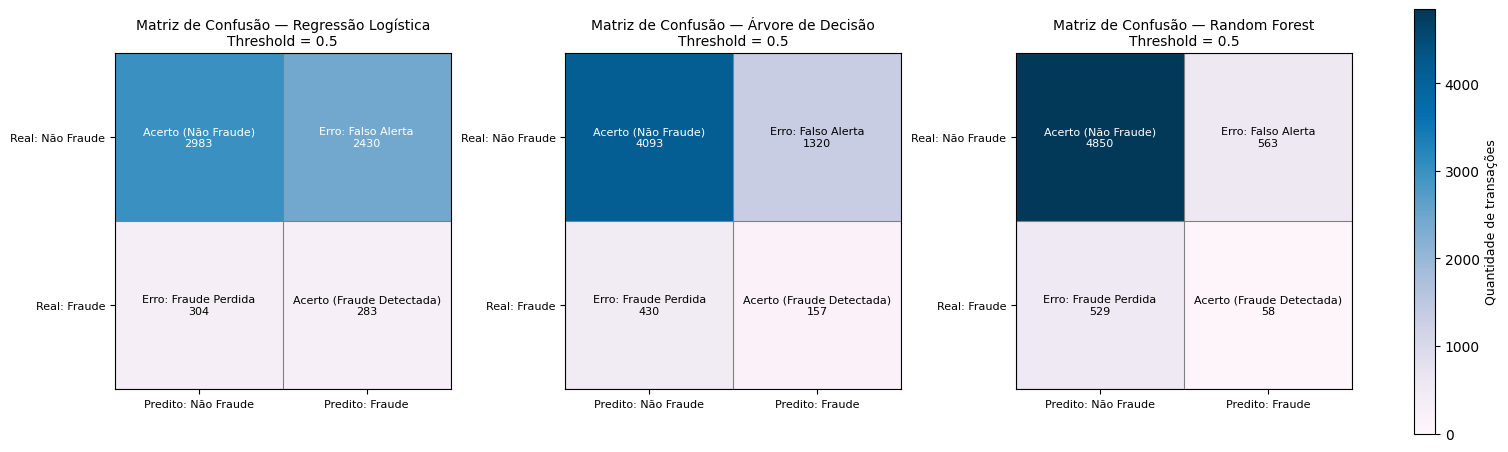

In [200]:
import matplotlib.pyplot as plt
import numpy as np

# Garantir que as 3 matrizes existam (se não existirem, recalcula a partir dos y_pred já gerados)
if "cm_logreg" not in globals():
    cm_logreg = confusion_matrix(y_test, y_test_pred_logreg)
if "cm_tree" not in globals():
    cm_tree = confusion_matrix(y_test, y_test_pred_tree)
if "cm_rf" not in globals():
    cm_rf = confusion_matrix(y_test, y_test_pred_rf)

cms = [
    ("Regressão Logística", cm_logreg),
    ("Árvore de Decisão", cm_tree),
    ("Random Forest", cm_rf),
]

vmax_global = max(cm.max() for _, cm in cms)

cell_text = [
    ["Acerto (Não Fraude)", "Erro: Falso Alerta"],
    ["Erro: Fraude Perdida", "Acerto (Fraude Detectada)"]
]

fig, axes = plt.subplots(1, 3, figsize=(15, 4.8), constrained_layout=True)

for ax, (title, cm) in zip(axes, cms):
    im = ax.imshow(cm, cmap="PuBu", vmin=0, vmax=vmax_global)

    ax.set_title(f"Matriz de Confusão — {title}\nThreshold = 0.5", fontsize=10)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["Predito: Não Fraude", "Predito: Fraude"], fontsize=8)
    ax.set_yticklabels(["Real: Não Fraude", "Real: Fraude"], fontsize=8)

    for i in range(2):
        for j in range(2):
            ax.text(
                j, i,
                f"{cell_text[i][j]}\n{cm[i, j]}",
                ha="center",
                va="center",
                fontsize=8,
                color="white" if cm[i, j] > vmax_global * 0.5 else "black"
            )

    ax.set_xticks(np.arange(-.5, 2, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 2, 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.8)
    ax.tick_params(which="minor", bottom=False, left=False)

cbar = fig.colorbar(im, ax=axes, shrink=0.9)
cbar.set_label("Quantidade de transações", fontsize=9)

plt.show()

<small>***Comentários Letícia:** Ao visualizar as matrizes de confusão lado a lado no holdout, ficou evidente o trade-off operacional entre os modelos. A Regressão Logística é a que mais recupera fraudes, mas também gera o maior volume de falsos alertas, o que aumenta o custo de triagem. A Árvore de Decisão reduz o volume de alertas, porém deixa passar mais fraudes e apresenta comportamento menos confiável no geral. A Random Forest foi a mais conservadora, gerando poucos alertas, mas praticamente não recuperando fraudes. Essa comparação visual reforça que, dentro do cenário atual de dados, a Regressão Logística oferece a melhor base para priorização de risco, principalmente por permitir ajuste de threshold e controle operacional mais transparente.*</small>


## 6.5 Checkpoint - Modelos Vencedor

Com base nos resultados consolidados de validação cruzada, avaliação em holdout e análise de trade-off operacional, foi definido o **modelo vencedor do projeto**.

**Modelo escolhido:** Regressão Logística

A decisão não se baseou em uma métrica isolada, mas em uma análise conjunta dos seguintes fatores:

- **Melhor PR-AUC** entre os modelos, tanto na validação cruzada quanto no conjunto de teste, indicando maior capacidade de ranqueamento das transações suspeitas.
- **Desempenho consistente entre treino e holdout**, com menor variação em comparação à Árvore de Decisão.
- **Maior recuperação absoluta de fraudes** no cenário operacional, ainda que ao custo de maior volume de alertas, permitindo controle posterior via ajuste de threshold.
- **Alta interpretabilidade**, possibilitando leitura direta dos sinais associados à fraude, auditoria do modelo e comunicação clara com áreas de negócio.
- **Estabilidade e previsibilidade**, características fundamentais para uso em ambientes reais de detecção de fraude.

Embora nenhum dos modelos tenha apresentado desempenho elevado em termos absolutos, a Regressão Logística demonstrou o melhor equilíbrio global entre capacidade discriminativa, controle operacional e transparência. Em especial, sua previsibilidade e interpretabilidade permitem ajustes finos de threshold para mitigar falsos positivos, aspecto crítico para o negócio, dado o impacto operacional do cancelamento indevido de cartões legítimos. Assim, o modelo foi adotado como baseline final do projeto, servindo como referência técnica sólida para evoluções futuras do sistema de detecção de fraude.



# 7. RESULTADOS FINAIS

O presente projeto teve como objetivo o desenvolvimento e avaliação de modelos preditivos para detecção de fraudes em transações de bilhetagem eletrônica, a partir de um conjunto de dados com 30.000 registros históricos. Ao longo do trabalho, foram conduzidas etapas completas de análise exploratória, tratamento de dados, engenharia de features, diagnóstico exploratório do espaço de variáveis e modelagem supervisionada, com comparação entre múltiplos algoritmos interpretáveis.

A etapa de diagnóstico exploratório da separabilidade evidenciou uma forte sobreposição entre transações fraudulentas e legítimas no espaço de features, mesmo após a construção de variáveis temporais, comportamentais e agregadas por cartão. Essa característica estrutural do problema indicou, desde o início da modelagem, limitações naturais para a obtenção de modelos com alto poder discriminativo utilizando apenas os dados disponíveis.

Na fase de modelagem, foram avaliados três algoritmos distintos: Regressão Logística, Árvore de Decisão e Random Forest, seguindo boas práticas de validação cruzada estratificada, uso de métricas adequadas para dados desbalanceados e análise em conjunto de teste independente (holdout). A Regressão Logística apresentou o melhor desempenho relativo em termos de PR-AUC, estabilidade e interpretabilidade, sendo definida como o modelo vencedor do projeto. Ainda assim, os resultados absolutos indicaram desempenho limitado, com valores próximos ao comportamento aleatório, reforçando a hipótese de baixa separabilidade entre as classes.

A análise de trade-off operacional mostrou que a escolha do modelo envolve um compromisso direto entre recuperação de fraudes e volume de falsos alertas. Em especial, considerando que o cancelamento indevido de cartões legítimos representa um impacto operacional crítico para o negócio, a Regressão Logística se destacou por permitir ajustes finos de threshold e maior transparência na tomada de decisão, mesmo não sendo um modelo altamente performático em termos absolutos.

De forma geral, os resultados indicam que o principal limitador do desempenho não está na escolha do algoritmo, mas sim na natureza dos dados disponíveis. Nesse contexto, a modelagem supervisionada atuou corretamente como ferramenta de priorização de risco, e não como solução definitiva de detecção automática de fraude.

**Sugestões de Evolução e Próximos Passos**

Considerando que se trata de um cenário real de negócio, algumas estratégias podem ser adotadas para ampliar a capacidade de identificação de fraudes:

- **Enriquecimento de dados**: incorporar novas fontes de informação, como histórico de localização mais detalhado, padrões de deslocamento geográfico, dados de dispositivos, integração com eventos externos e informações de comportamento ao longo do tempo.
- **Features sequenciais e temporais avançadas**: modelar explicitamente a sequência de transações por cartão, utilizando janelas móveis, taxas de mudança e padrões de repetição mais complexos.
- **Reformulação do problema**: tratar a detecção como um problema de ranqueamento ou priorização de risco, em vez de classificação binária rígida, integrando o modelo a fluxos de revisão humana.
- **Ajuste dinâmico de thresholds**: definir limiares de decisão distintos conforme o perfil do cartão, horário ou contexto operacional, reduzindo o risco de falsos positivos.
- **Exploração de métodos não supervisionados ou semi-supervisionados**: como detecção de anomalias, especialmente úteis em cenários onde os rótulos de fraude são escassos ou ruidosos.

Em síntese, o projeto atingiu seus objetivos ao construir um pipeline completo, reproduzível e interpretável de detecção de fraude, ao mesmo tempo em que diagnosticou de forma transparente os limites do problema. A principal contribuição do trabalho reside não apenas nos modelos avaliados, mas na compreensão clara de onde estão as restrições e quais caminhos são mais promissores para evoluir a solução em um ambiente real.
